# Data Analysis and Visualization - Electric Motor Dataset

In [9]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [10]:
pd.set_option('display.float_format', '{:.6f}'.format)

In [11]:
# Reading the dataset
df = pd.read_csv('measures_v2.csv')
df.head(5)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [12]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [14]:
df.shape

(1330816, 13)

In [15]:
# Checking for missing values in the dataset
df.isna().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

## Torque

In [16]:
df['torque'].describe()

count   1330816.000000
mean         31.106032
std          77.135755
min        -246.466663
25%          -0.137427
50%          10.860354
75%          91.597176
max         261.005707
Name: torque, dtype: float64

In [17]:
print('Kurtosis =',round(df['torque'].kurt(),6)) # type: ignore

Kurtosis = 0.669516


The data for the torque attribute is **leptokurtic** (kurtosis < 3) <br> in nature - **short tails** and **few outliers**

In [18]:
print('Skewness =',round(df['torque'].skew(),6)) # type: ignore

Skewness = -0.127141


The data for the torque attribute is **left skewed** (skewness < 0)

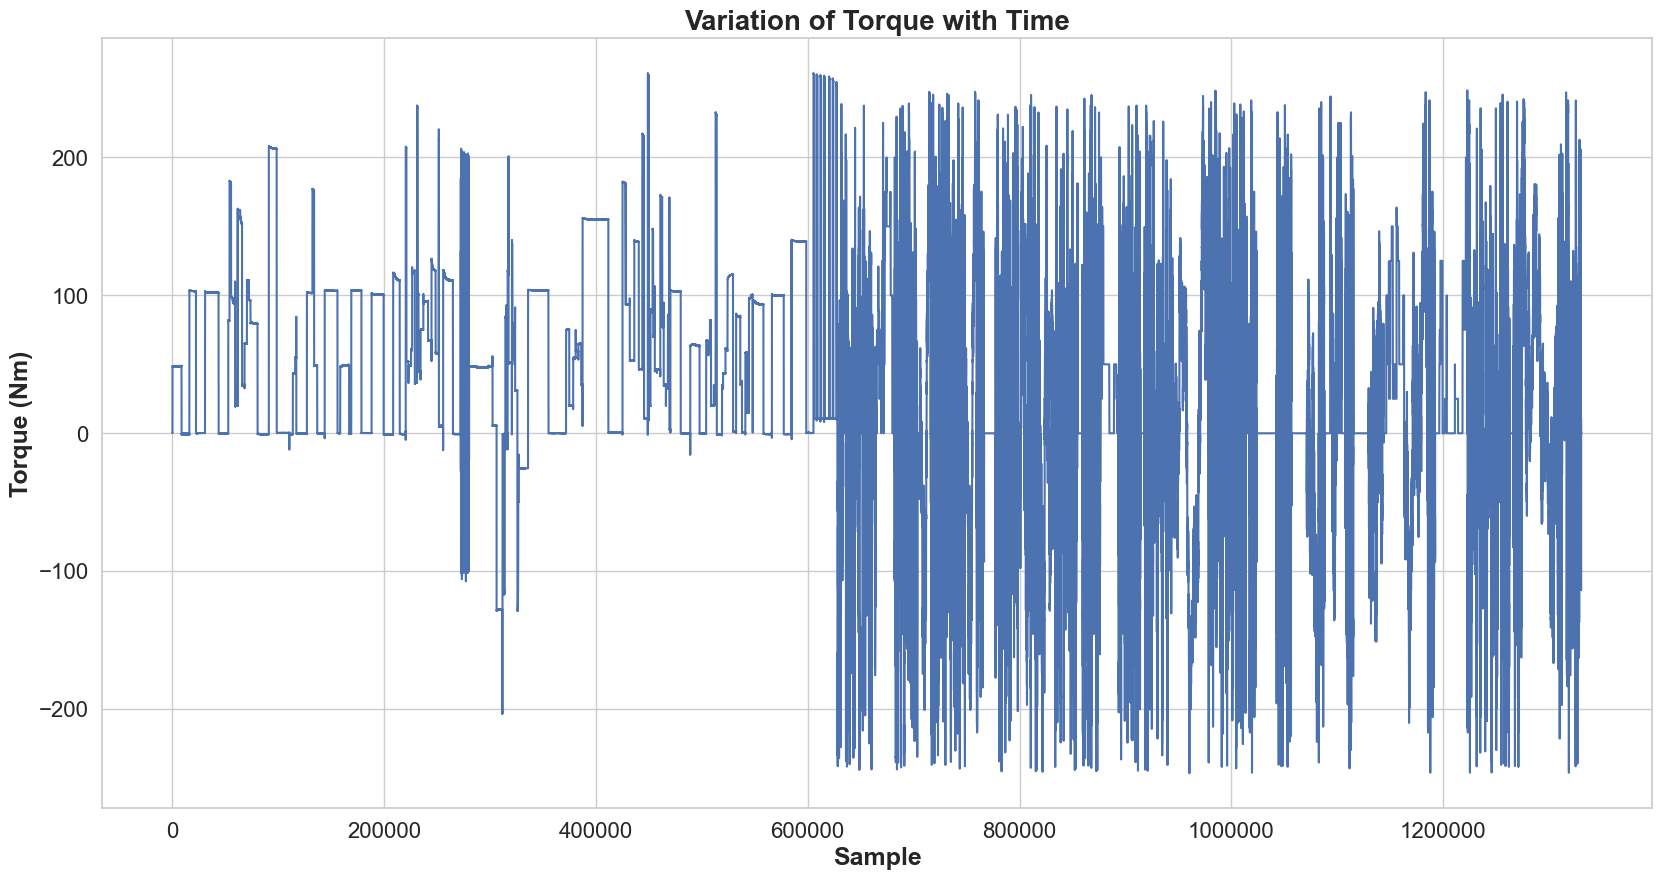

In [20]:
plt.figure(figsize = (20,10))
plt.plot(df['torque'])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Variation of Torque with Time', fontsize = 20, fontweight = 'bold')
plt.show()

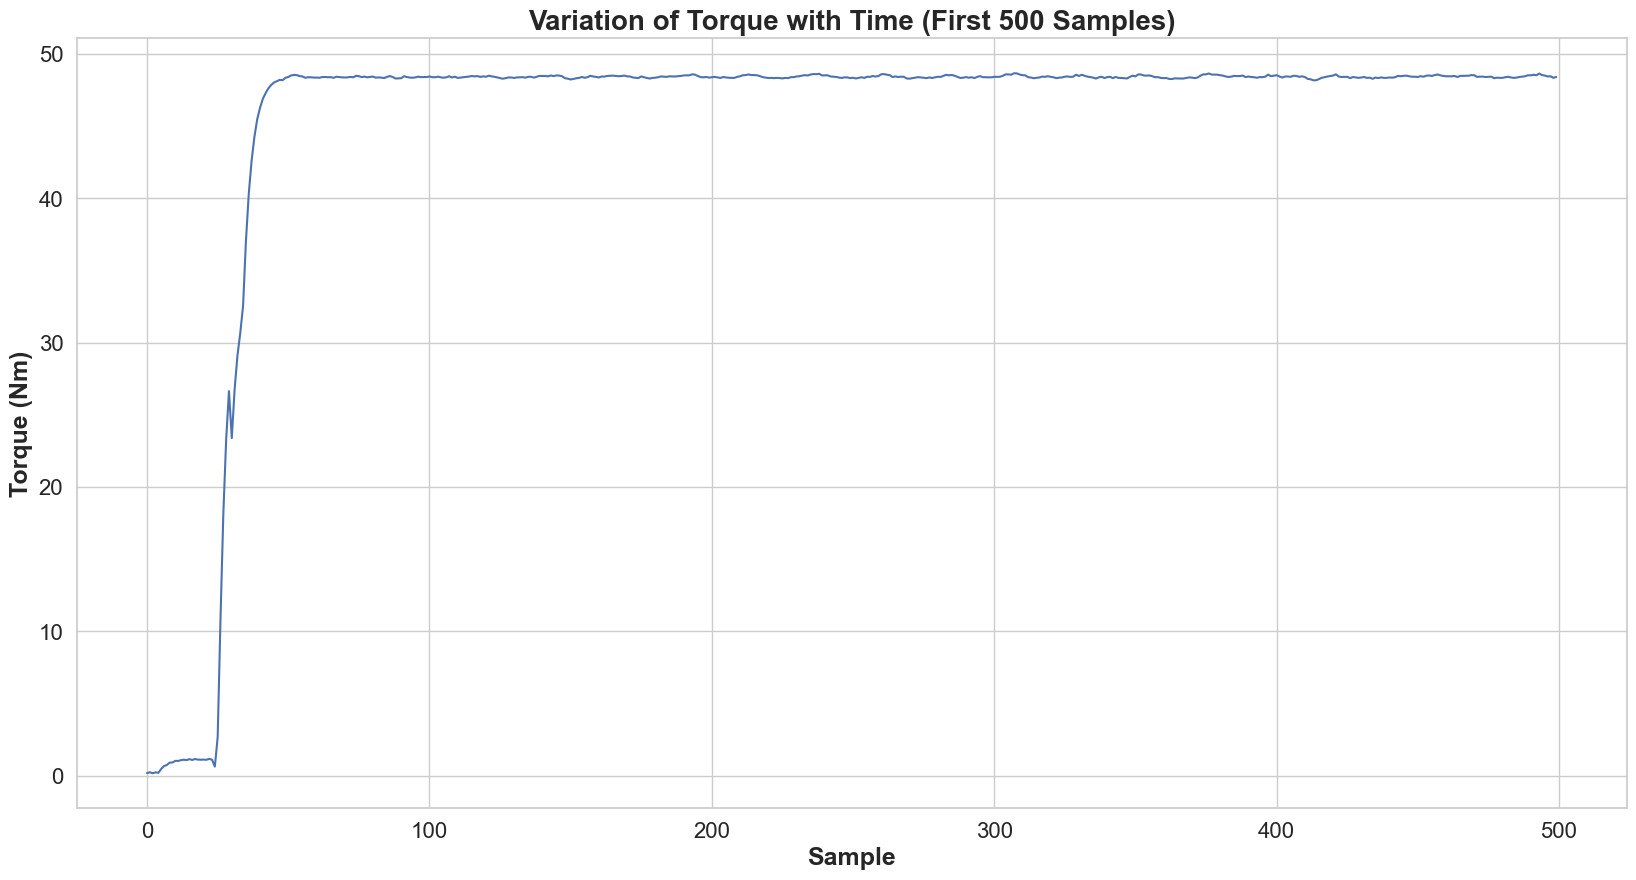

In [21]:
plt.figure(figsize = (20,10))
plt.plot(df['torque'][0:500])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Variation of Torque with Time (First 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

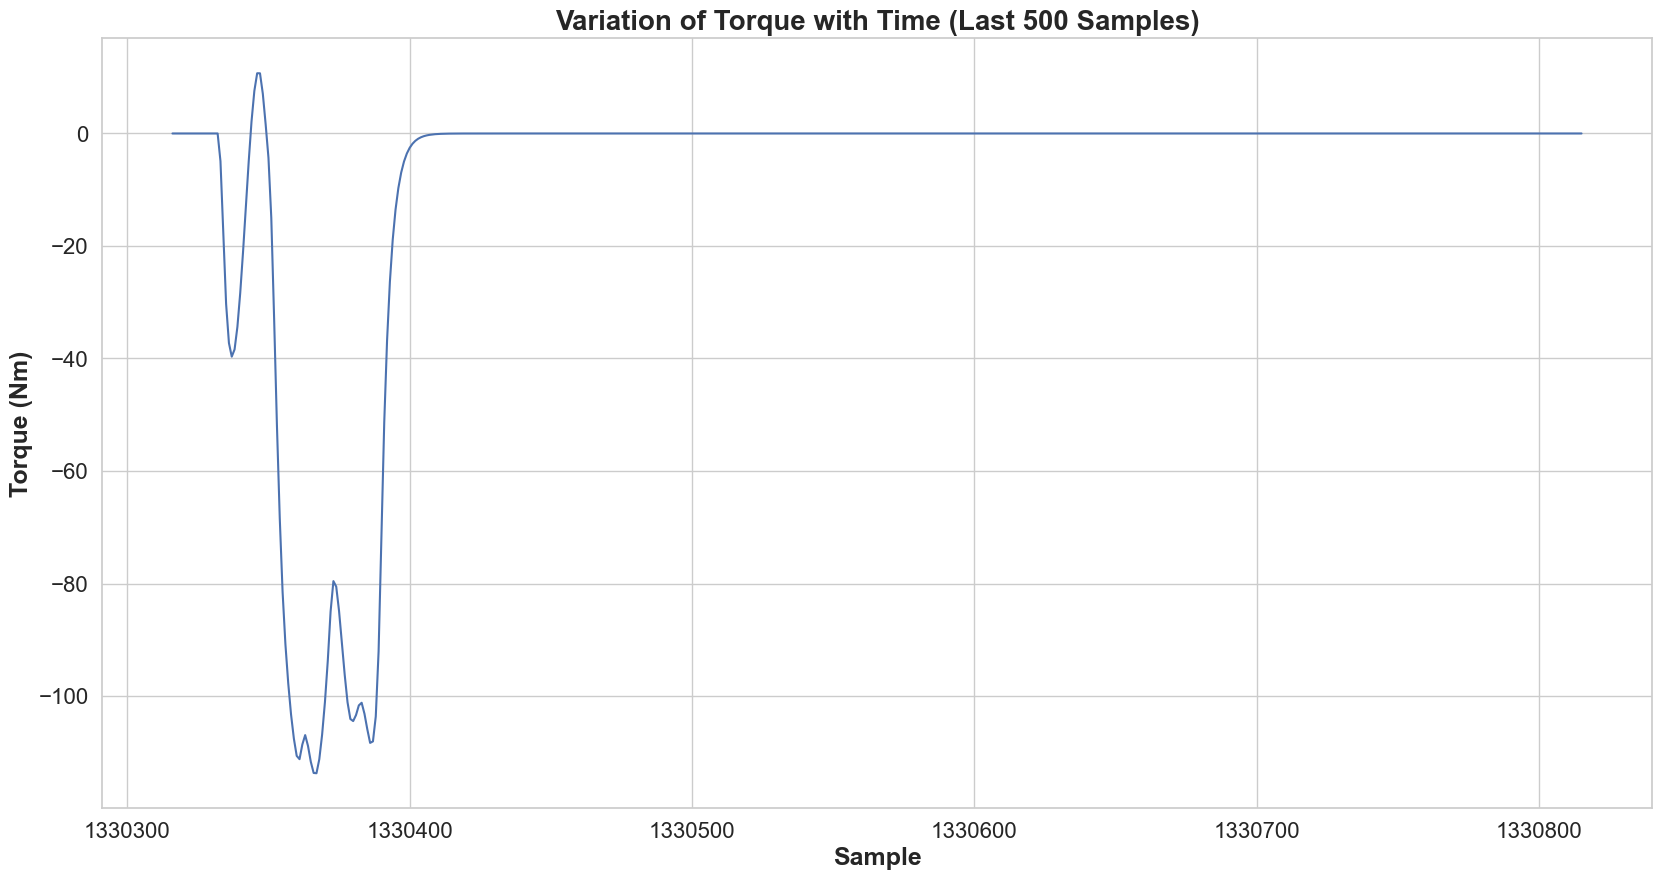

In [22]:
plt.figure(figsize = (20,10))
plt.plot(df['torque'][-500:])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Torque (Nm)', fontsize = 18, weight = 'bold')
plt.title('Variation of Torque with Time (Last 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

## Speed

In [23]:
df['motor_speed'].describe()

count   1330816.000000
mean       2202.080728
std        1859.663350
min        -275.549144
25%         317.110665
50%        1999.976685
75%        3760.639058
max        6000.015137
Name: motor_speed, dtype: float64

In [24]:
print('Kurtosis =',round(df['motor_speed'].kurt(),6)) # type: ignore

Kurtosis = -1.147801


The data for the speed attribute is **leptokurtic** (kurtosis < 3) <br> in nature - **short tails** and **few outliers**

In [25]:
print('Skewness =',round(df['motor_speed'].skew(),6)) # type: ignore

Skewness = 0.386464


The data for the speed attribute is **right skewed** (skewness > 0)

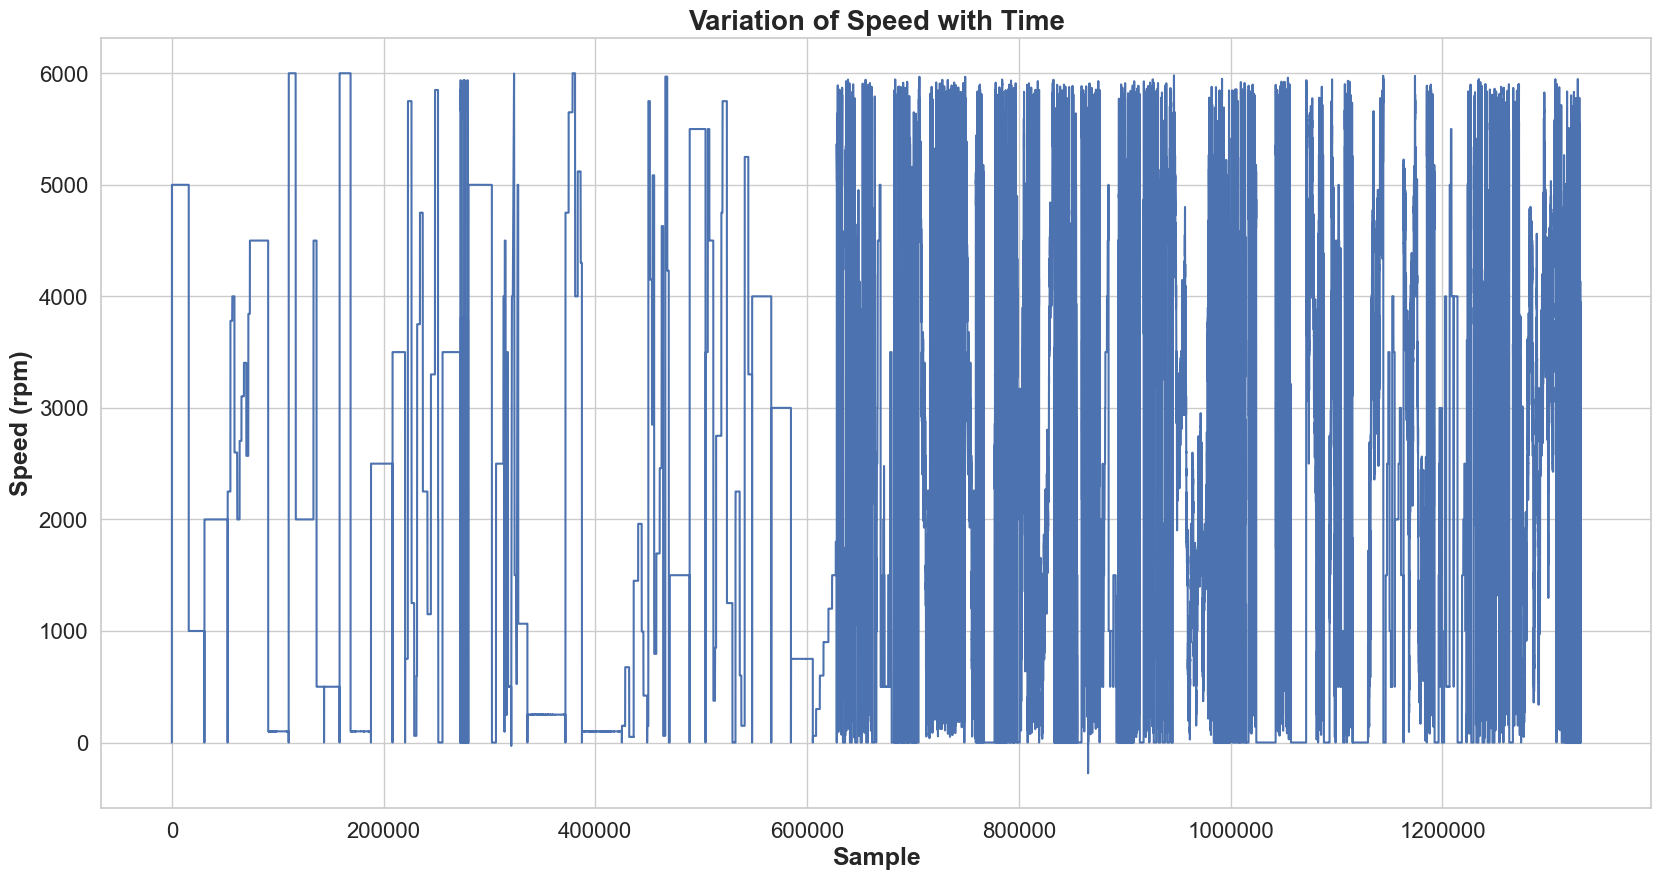

In [26]:
plt.figure(figsize = (20,10))
plt.plot(df['motor_speed'])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Speed (rpm)', fontsize = 18, weight = 'bold')
plt.title('Variation of Speed with Time', fontsize = 20, fontweight = 'bold')
plt.show()

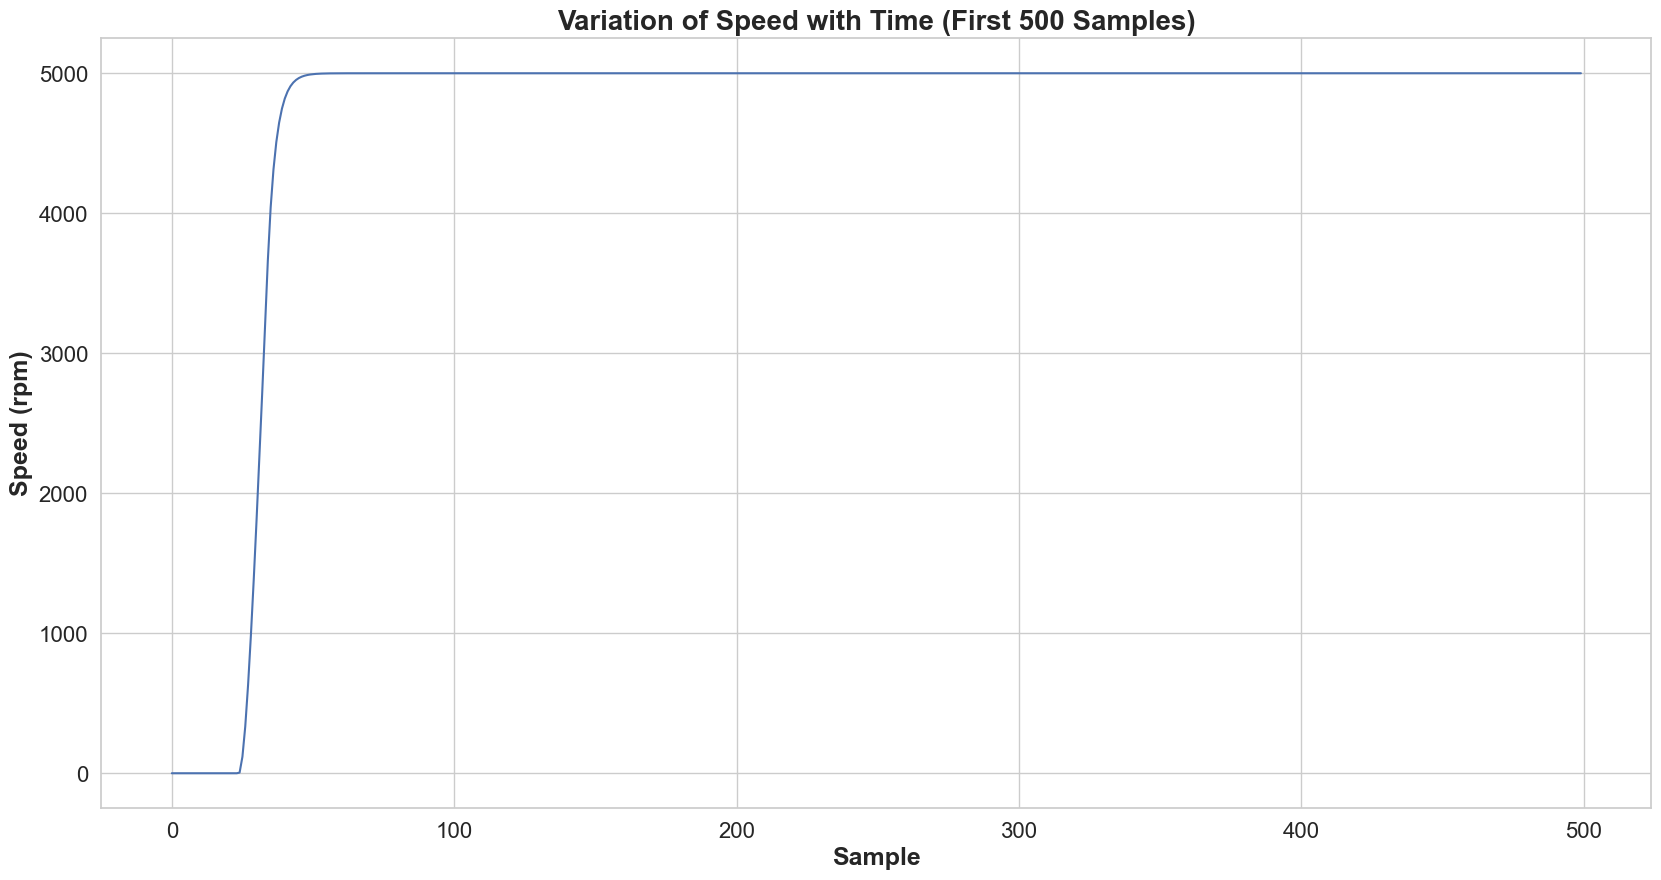

In [27]:
plt.figure(figsize = (20,10))
plt.plot(df['motor_speed'][0:500])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Speed (rpm)', fontsize = 18, weight = 'bold')
plt.title('Variation of Speed with Time (First 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

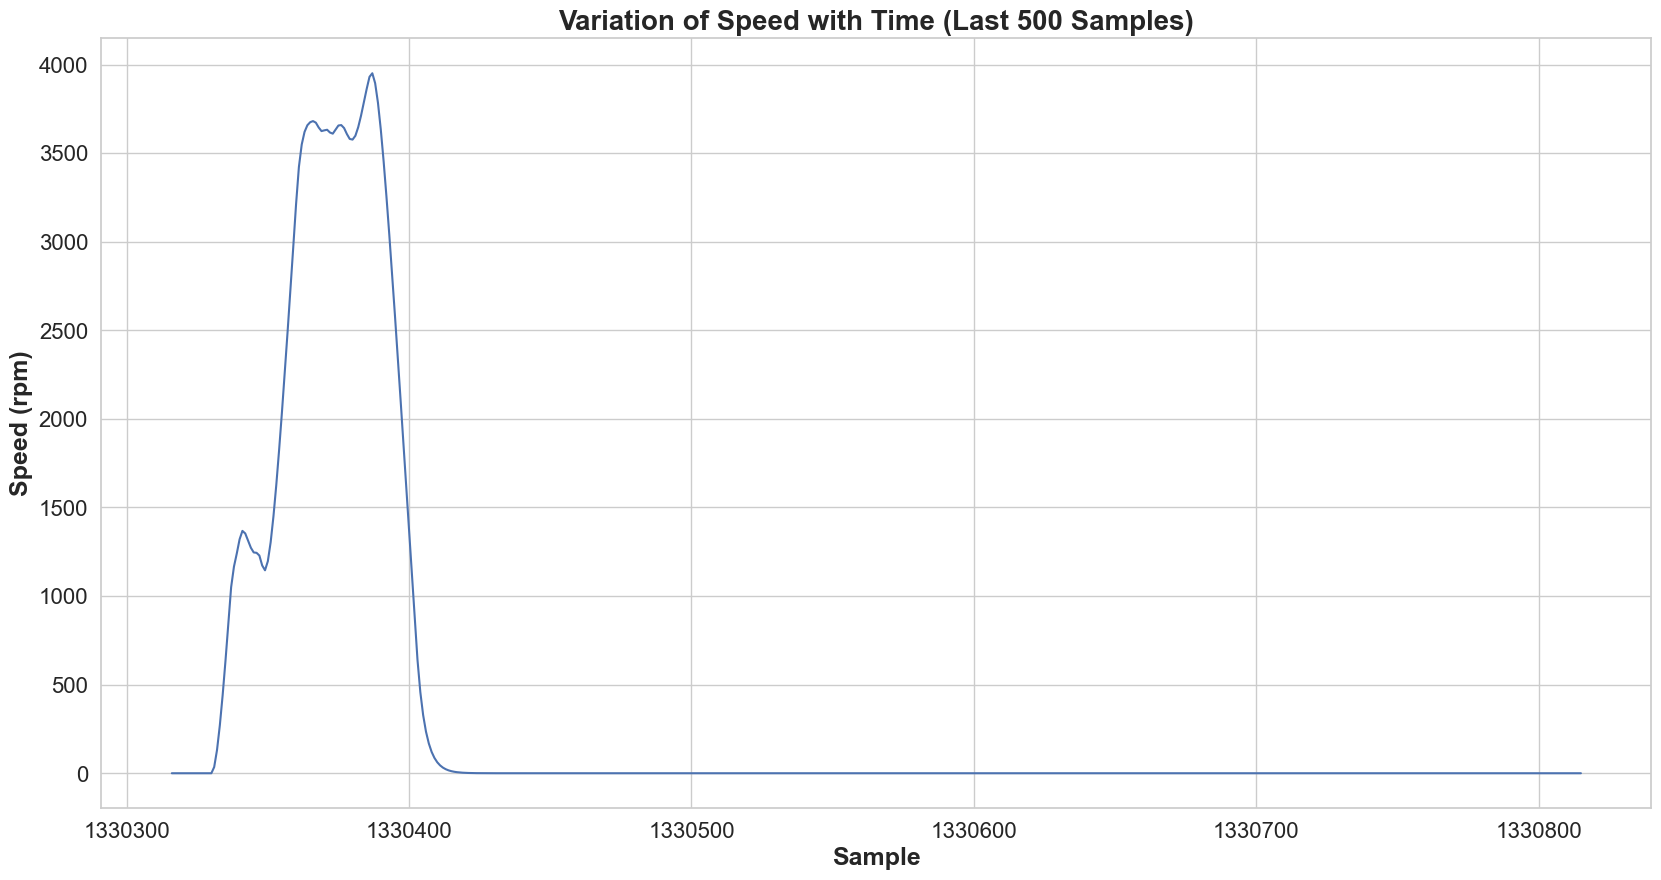

In [28]:
plt.figure(figsize = (20,10))
plt.plot(df['motor_speed'][-500:])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Speed (rpm)', fontsize = 18, weight = 'bold')
plt.title('Variation of Speed with Time (Last 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

## Voltage q-component

In [29]:
df['u_q'].describe()

count   1330816.000000
mean         54.279005
std          44.173234
min         -25.290930
25%          12.069925
50%          48.938181
75%          90.034393
max         133.036994
Name: u_q, dtype: float64

In [30]:
print('Kurtosis =',round(df['u_q'].kurt(),6)) # type: ignore

Kurtosis = -1.243061


The data for the voltage q-component attribute is **leptokurtic** (kurtosis < 3) <br> in nature - **short tails** and **few outliers**

In [31]:
print('Skewness =',round(df['u_q'].skew(),6)) # type: ignore

Skewness = 0.314933


The data for the voltage q-component attribute is **right skewed** (skewness > 0)

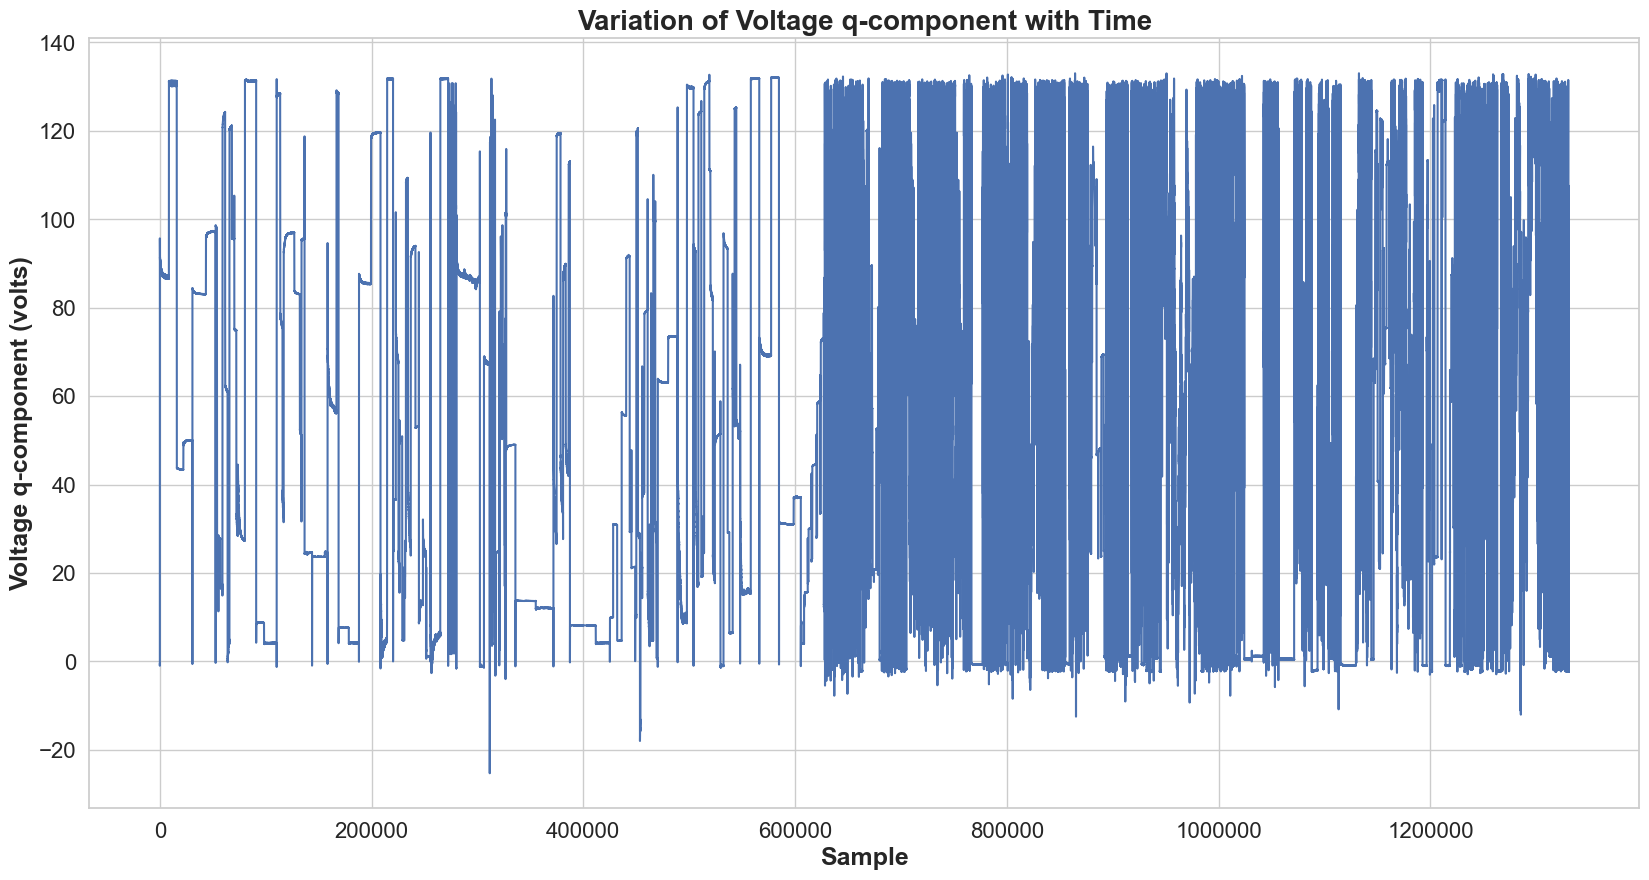

In [32]:
plt.figure(figsize = (20,10))
plt.plot(df['u_q'])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Voltage q-component (volts)', fontsize = 18, weight = 'bold')
plt.title('Variation of Voltage q-component with Time', fontsize = 20, fontweight = 'bold')
plt.show()

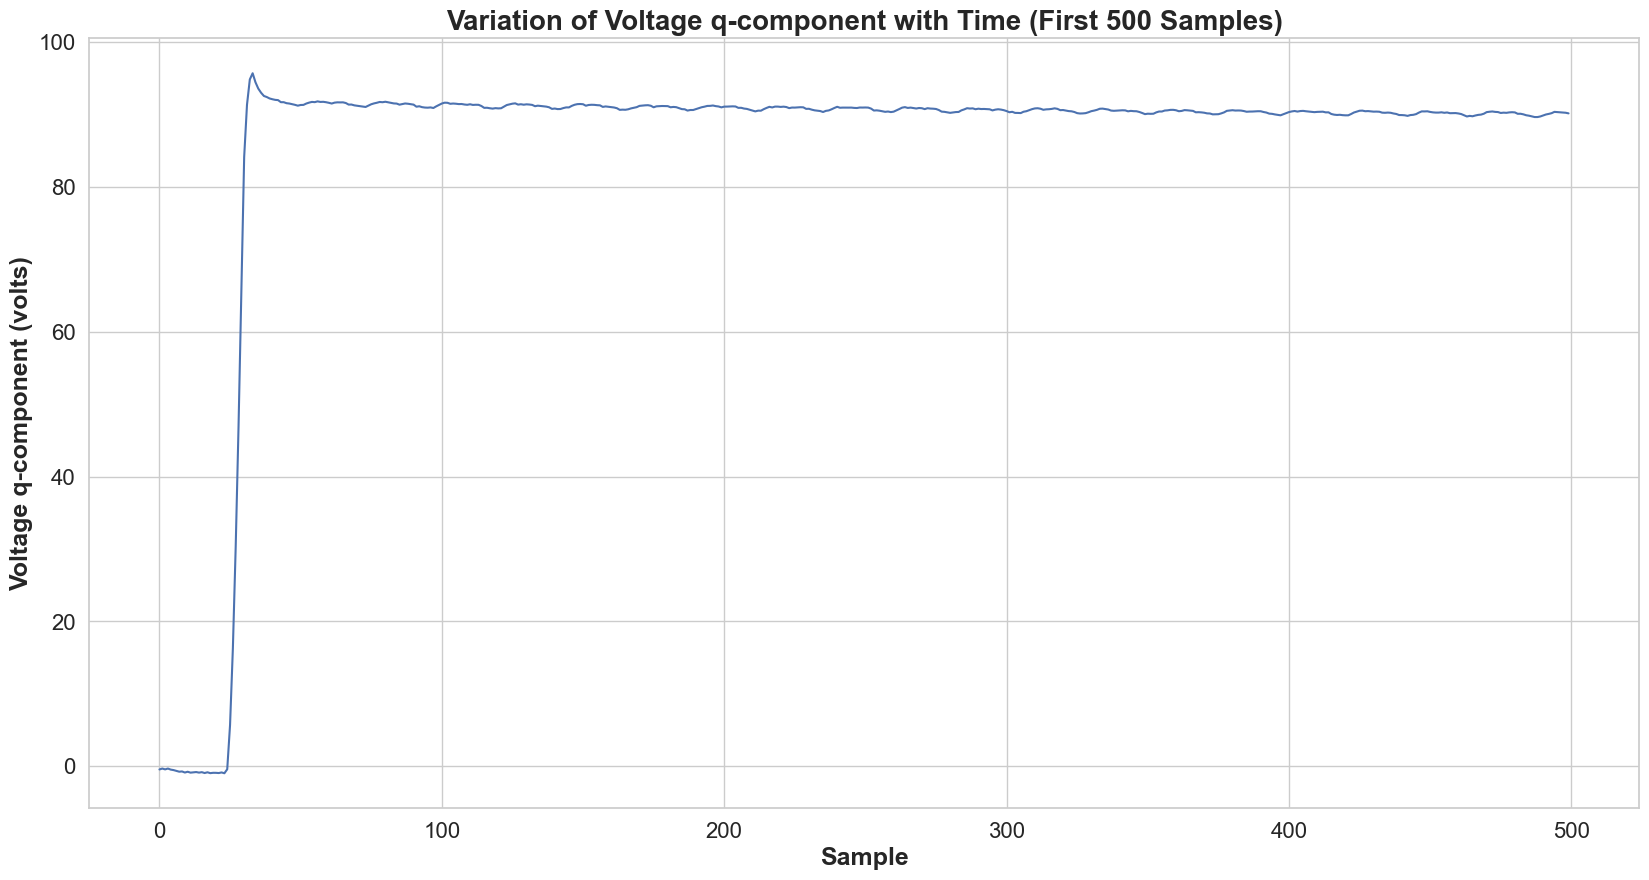

In [33]:
plt.figure(figsize = (20,10))
plt.plot(df['u_q'][:500])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Voltage q-component (volts)', fontsize = 18, weight = 'bold')
plt.title('Variation of Voltage q-component with Time (First 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

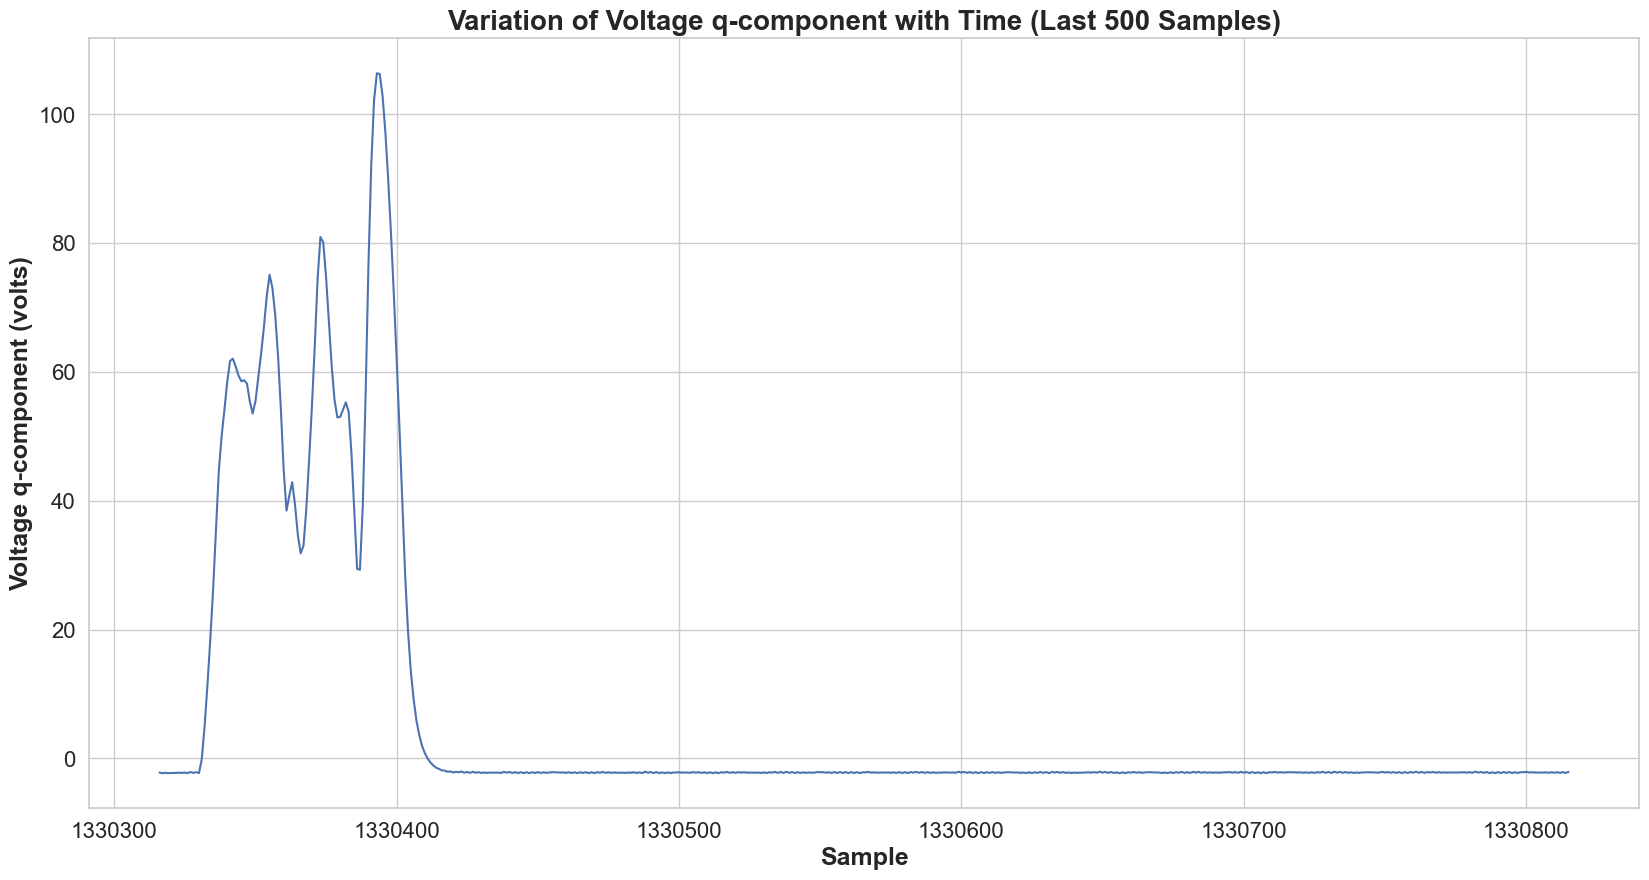

In [34]:
plt.figure(figsize = (20,10))
plt.plot(df['u_q'][-500:])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Voltage q-component (volts)', fontsize = 18, weight = 'bold')
plt.title('Variation of Voltage q-component with Time (Last 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

## Voltage d-component

In [35]:
df['u_d'].describe()

count   1330816.000000
mean        -25.133809
std          63.091972
min        -131.530411
25%         -78.690904
50%          -7.429755
75%           1.470271
max         131.469788
Name: u_d, dtype: float64

In [36]:
print('Kurtosis =',round(df['u_d'].kurt(),6)) # type: ignore

Kurtosis = -0.290316


The data for the voltage d-component attribute is **leptokurtic** (kurtosis < 3) <br> in nature - **short tails** and **few outliers**

In [37]:
print('Skewness =',round(df['u_d'].skew(),6)) # type: ignore

Skewness = 0.145061


The data for the voltage q-component attribute is **right skewed** (skewness > 0)

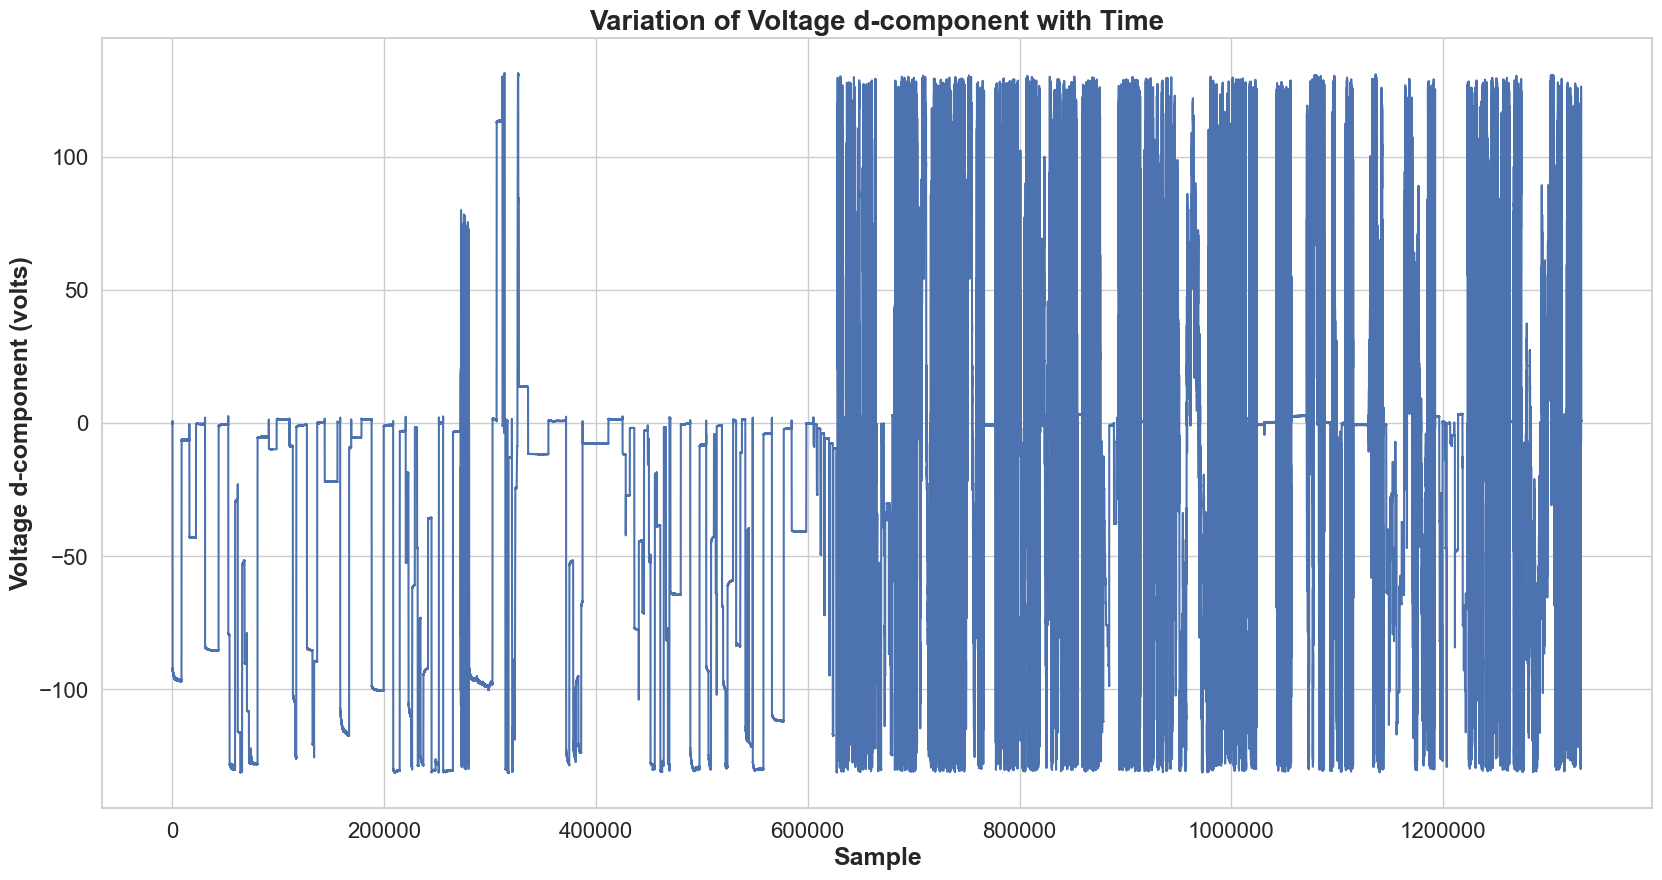

In [38]:
plt.figure(figsize = (20,10))
plt.plot(df['u_d'])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Voltage d-component (volts)', fontsize = 18, weight = 'bold')
plt.title('Variation of Voltage d-component with Time', fontsize = 20, fontweight = 'bold')
plt.show()

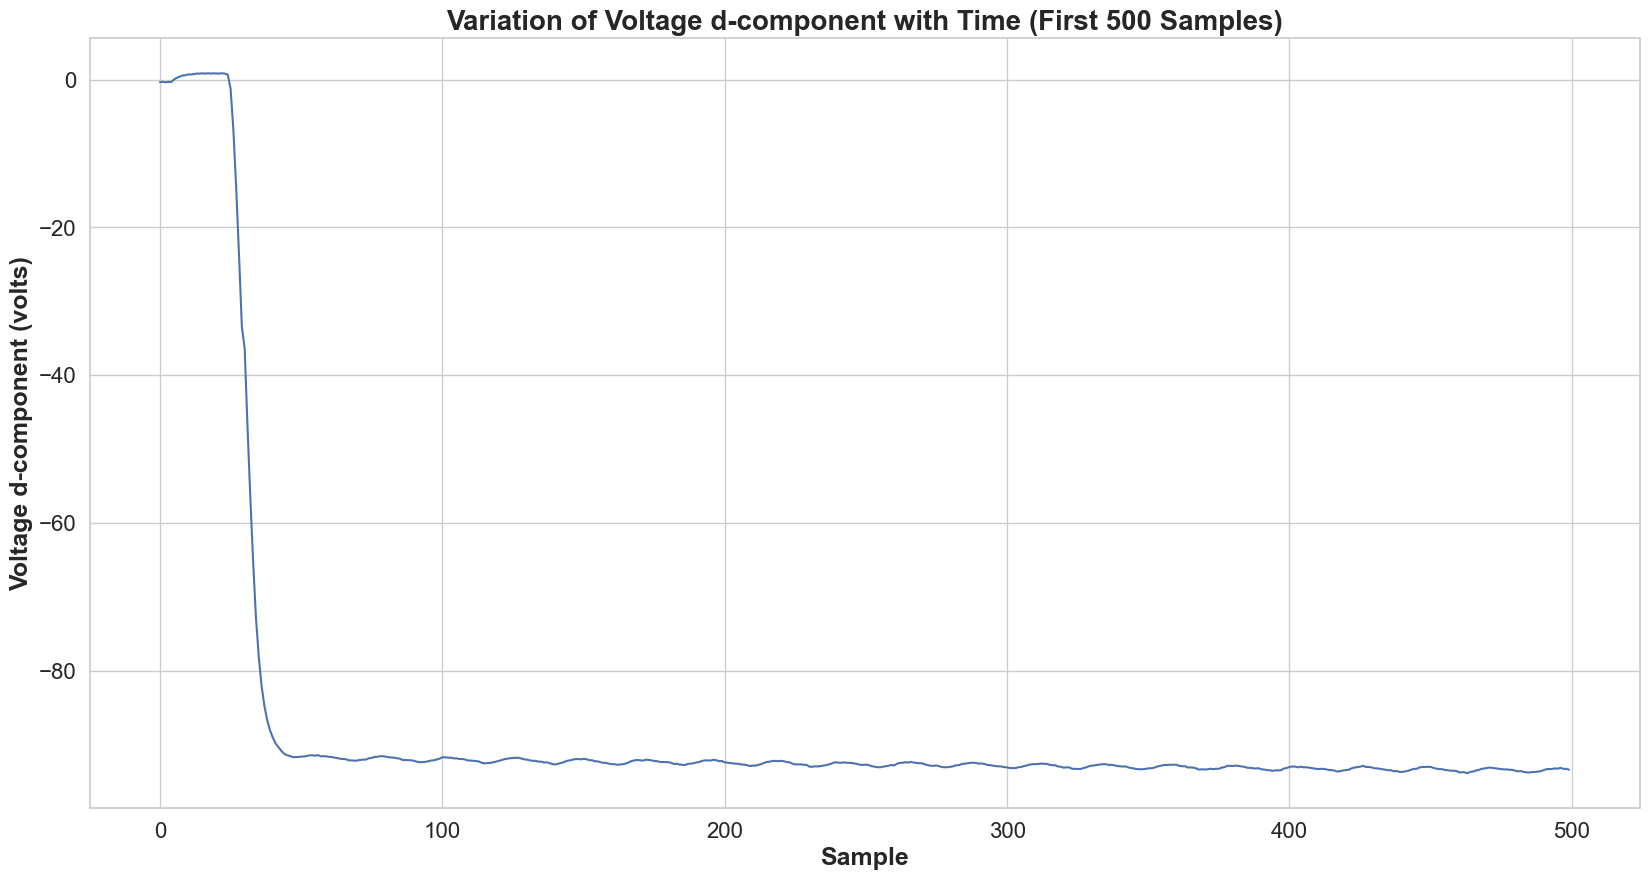

In [39]:
plt.figure(figsize = (20,10))
plt.plot(df['u_d'][:500])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Voltage d-component (volts)', fontsize = 18, weight = 'bold')
plt.title('Variation of Voltage d-component with Time (First 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

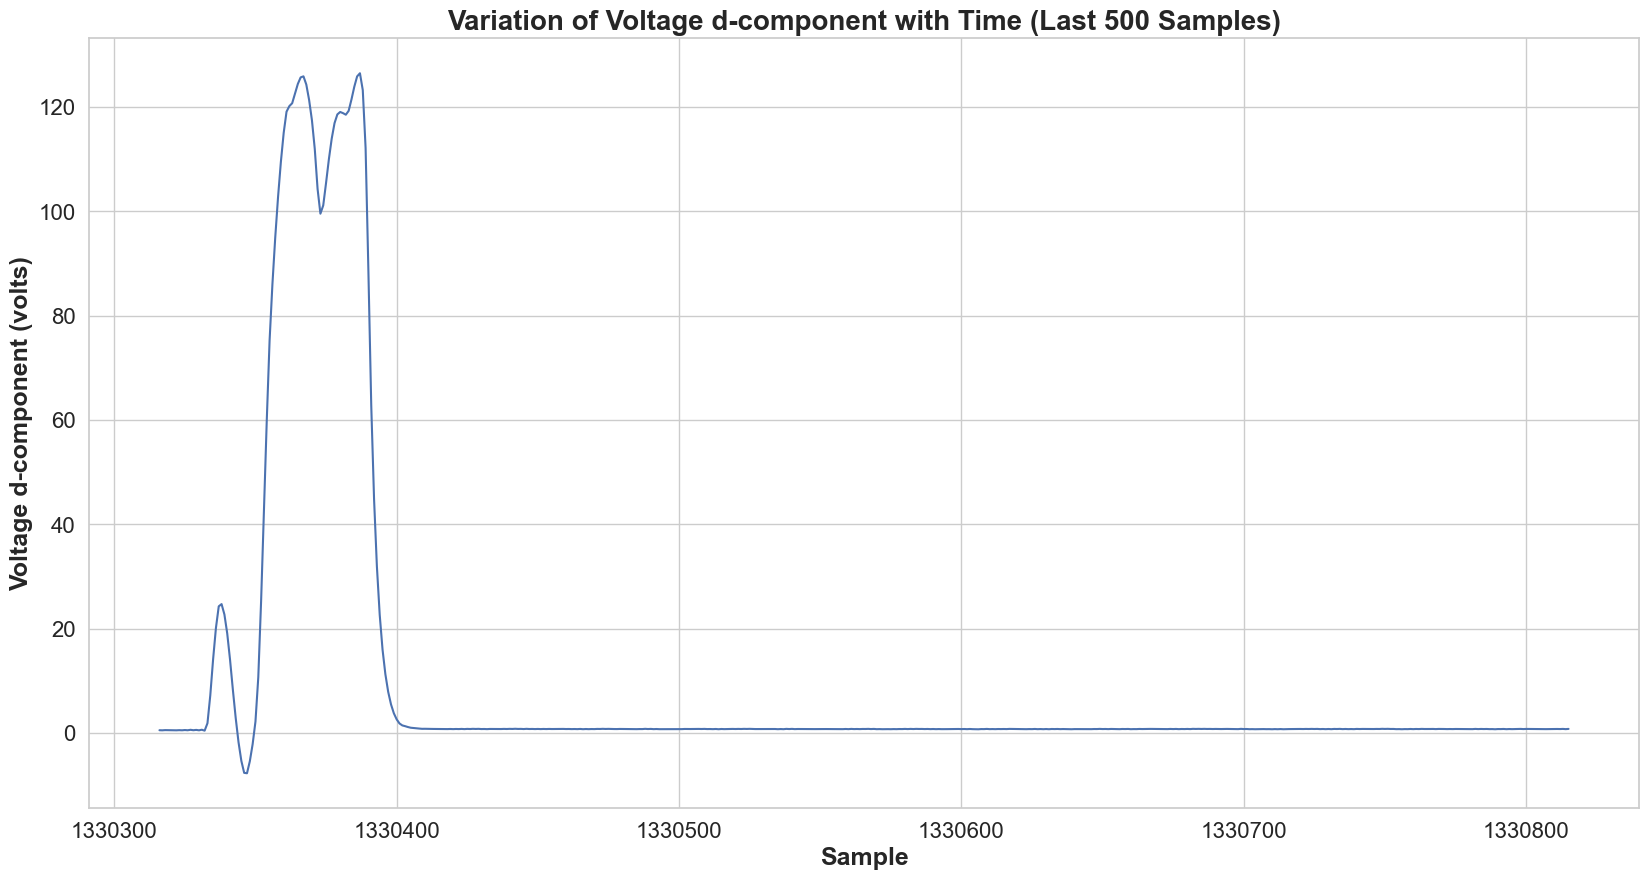

In [40]:
plt.figure(figsize = (20,10))
plt.plot(df['u_d'][-500:])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Voltage d-component (volts)', fontsize = 18, weight = 'bold')
plt.title('Variation of Voltage d-component with Time (Last 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

## Current q-component

In [41]:
df['i_q'].describe()

count   1330816.000000
mean         37.412782
std          92.181880
min        -293.426793
25%           1.095863
50%          15.774007
75%         100.612150
max         301.707855
Name: i_q, dtype: float64

In [42]:
print('Kurtosis =',round(df['i_q'].kurt(),6)) # type: ignore

Kurtosis = 0.6775


The data for the current q-component attribute is **leptokurtic** (kurtosis < 3) <br> in nature - **short tails** and **few outliers**

In [43]:
print('Skewness =',round(df['i_q'].skew(),6)) # type: ignore

Skewness = -0.146505


The data for the current q-component attribute is **left skewed** (skewness < 0)

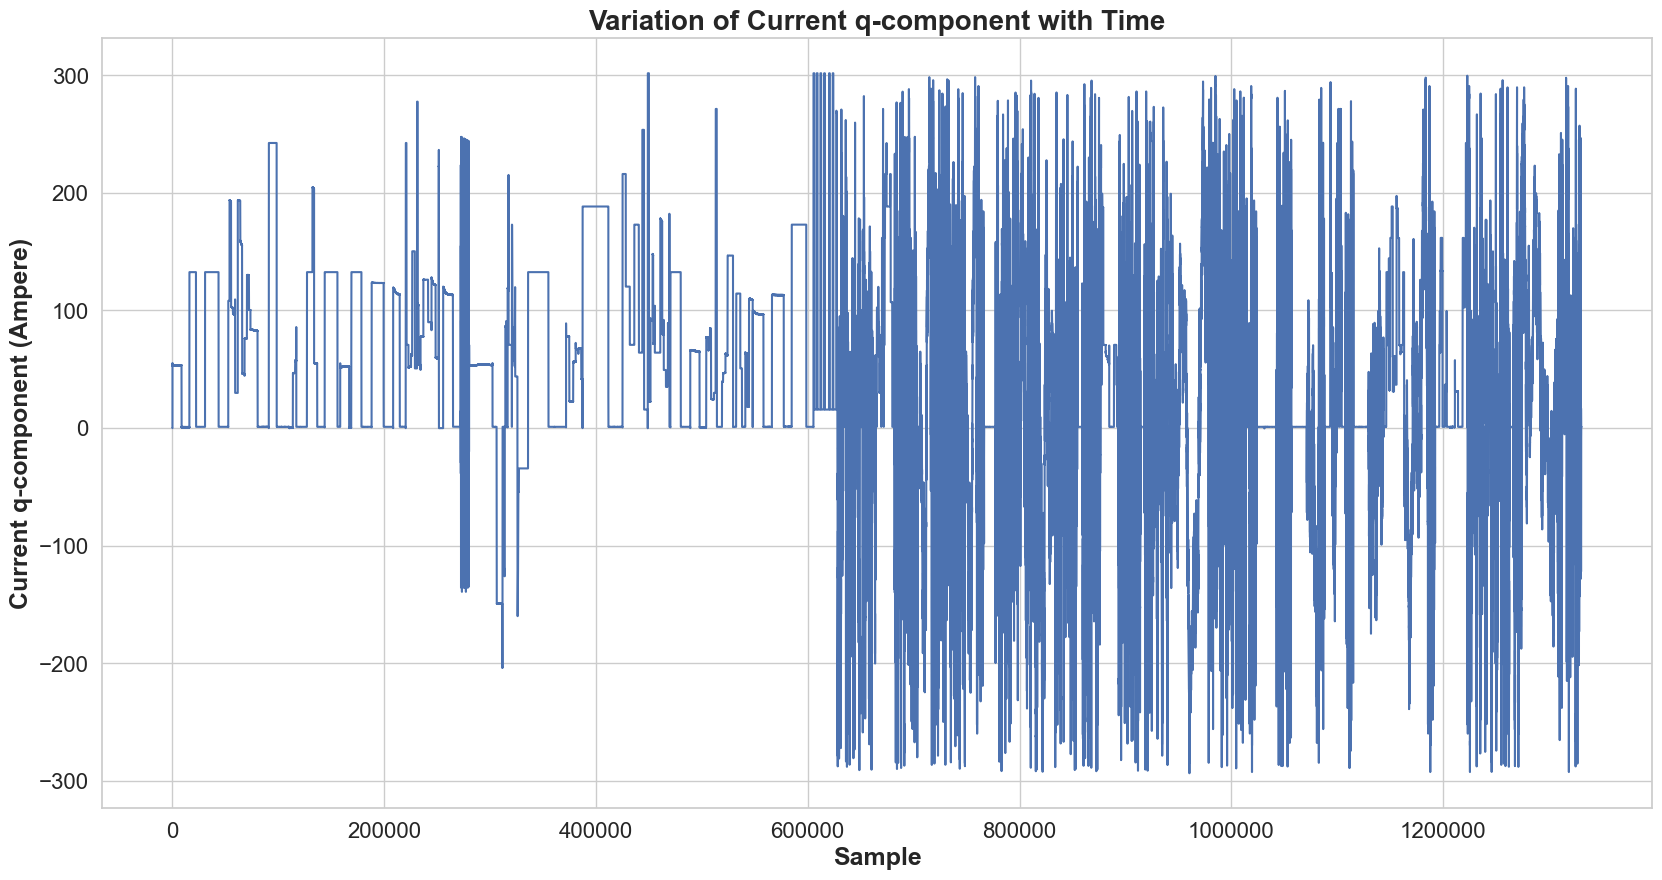

In [44]:
plt.figure(figsize = (20,10))
plt.plot(df['i_q'])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Current q-component (Ampere)', fontsize = 18, weight = 'bold')
plt.title('Variation of Current q-component with Time', fontsize = 20, fontweight = 'bold')
plt.show()

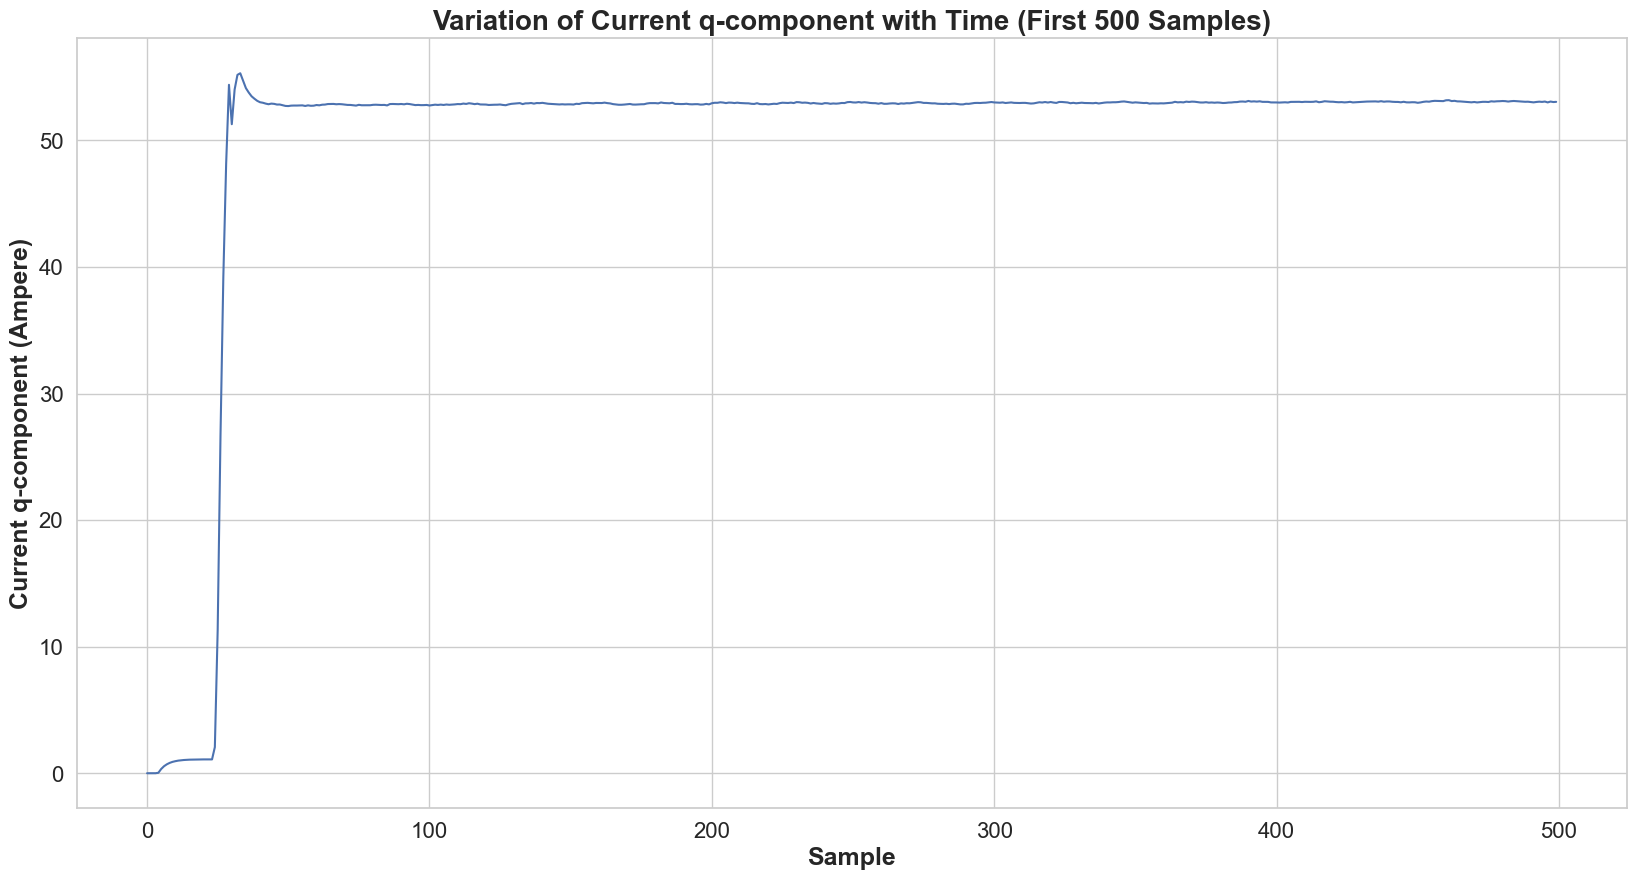

In [45]:
plt.figure(figsize = (20,10))
plt.plot(df['i_q'][:500])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Current q-component (Ampere)', fontsize = 18, weight = 'bold')
plt.title('Variation of Current q-component with Time (First 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

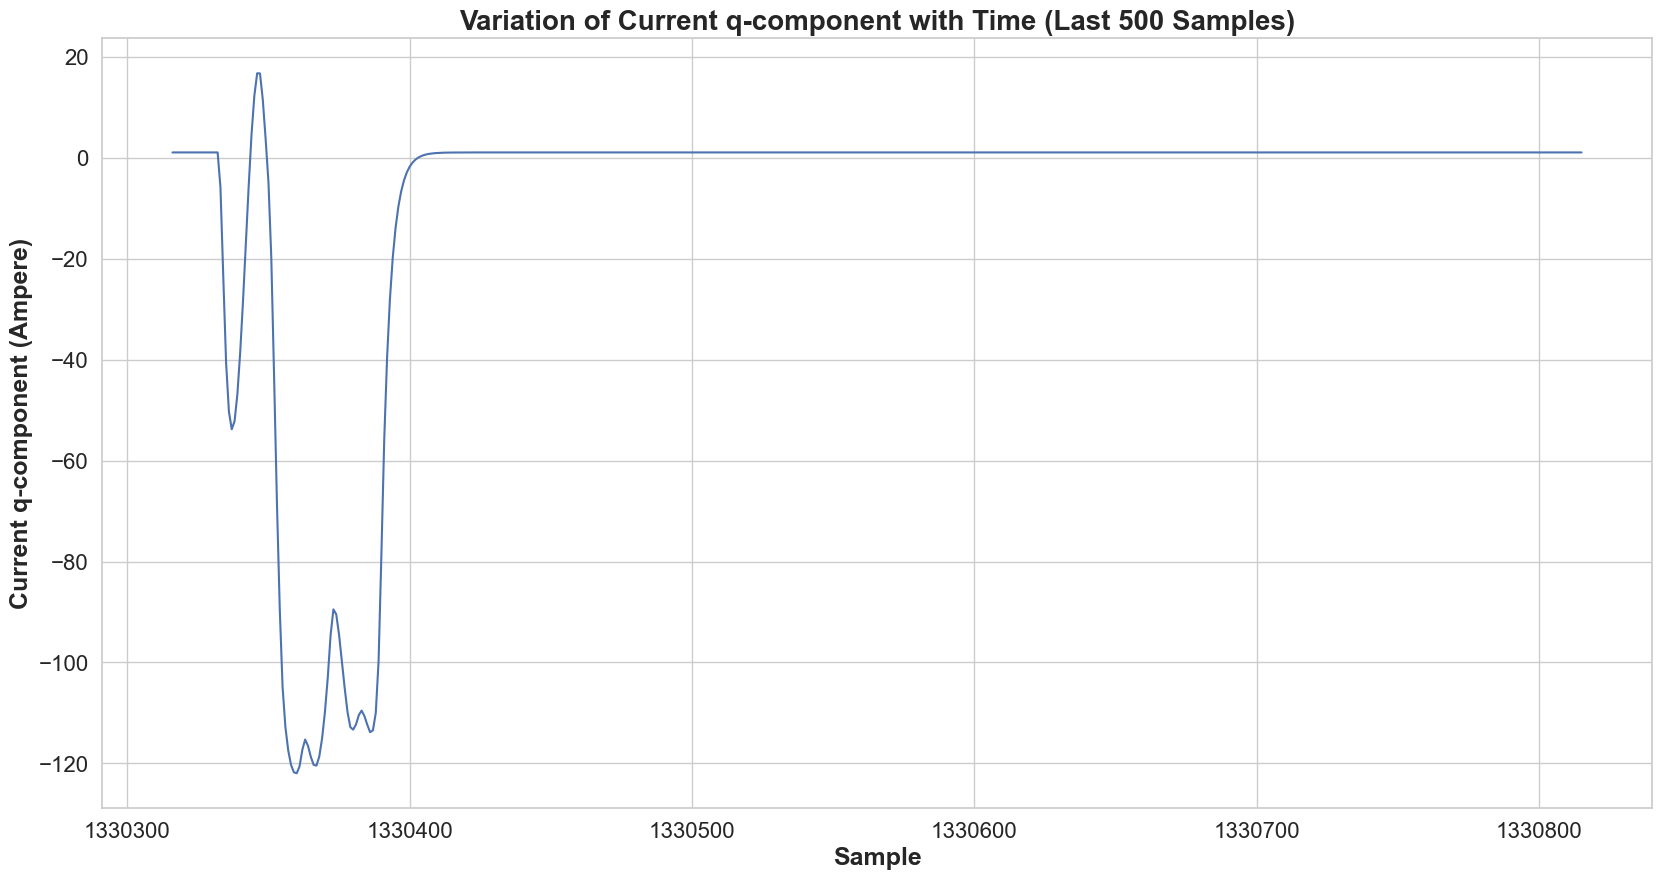

In [46]:
plt.figure(figsize = (20,10))
plt.plot(df['i_q'][-500:])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Current q-component (Ampere)', fontsize = 18, weight = 'bold')
plt.title('Variation of Current q-component with Time (Last 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

## Current d-component

In [47]:
df['i_d'].describe()

count   1330816.000000
mean        -68.716810
std          64.933233
min        -278.003632
25%        -115.406060
50%         -51.093763
75%          -2.979688
max           0.051897
Name: i_d, dtype: float64

In [48]:
print('Kurtosis =',round(df['i_d'].kurt(),6)) # type: ignore

Kurtosis = -0.565281


The data for the current d-component attribute is **leptokurtic** (kurtosis < 3) <br> in nature - **short tails** and **few outliers**

In [49]:
print('Skewness =',round(df['i_d'].skew(),6)) # type: ignore

Skewness = -0.707305


The data for the current d-component attribute is **left skewed** (skewness < 0)

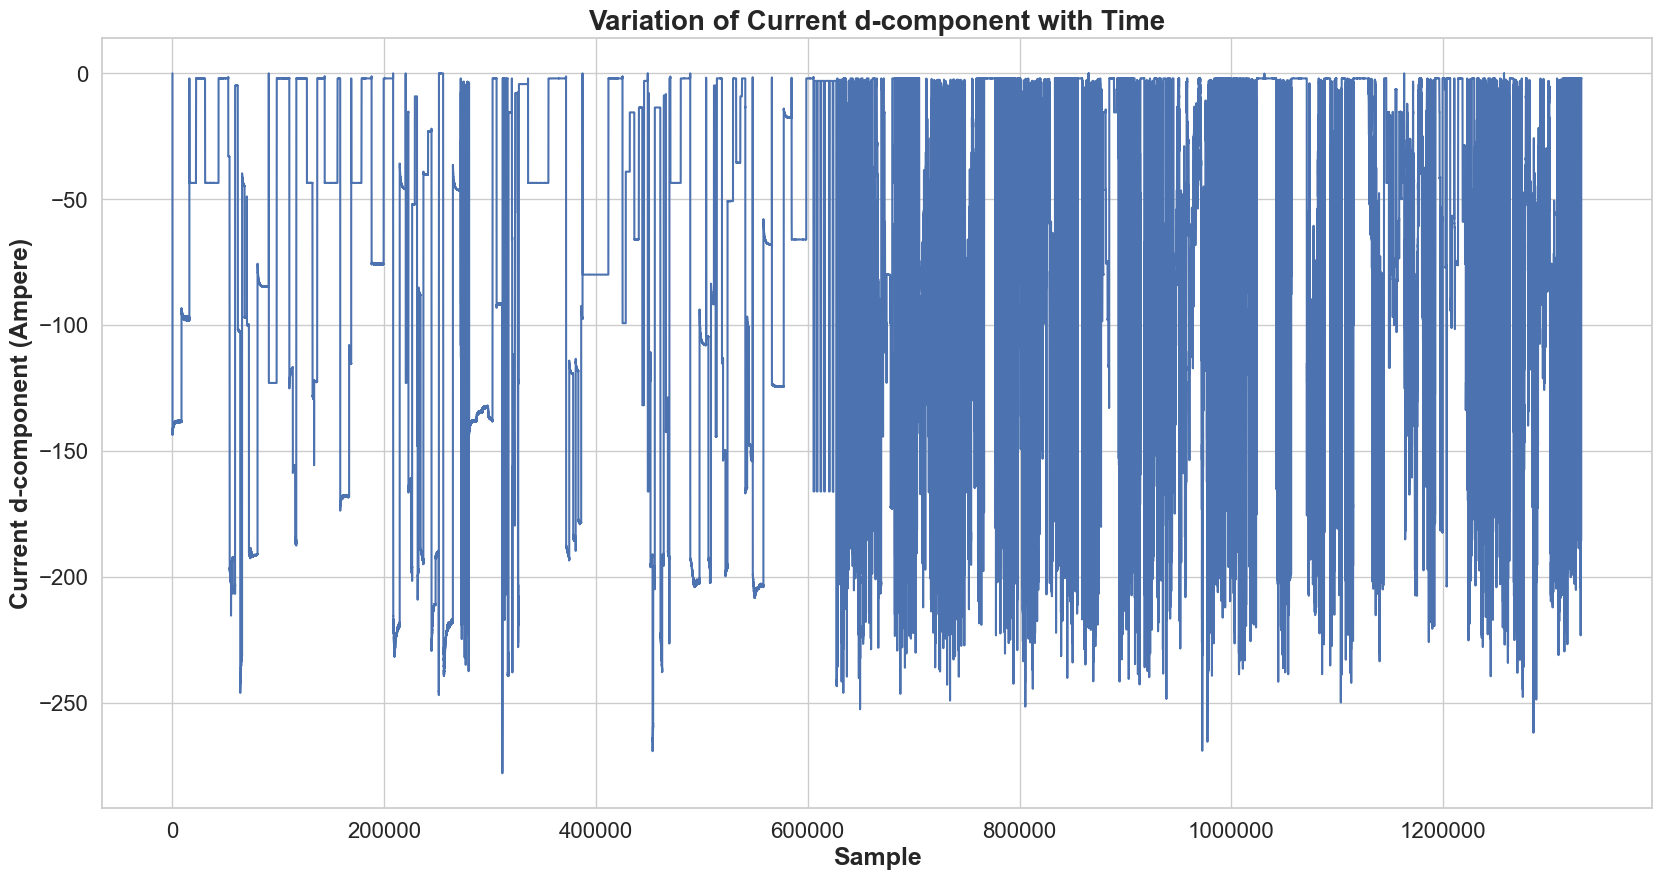

In [50]:
plt.figure(figsize = (20,10))
plt.plot(df['i_d'])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Current d-component (Ampere)', fontsize = 18, weight = 'bold')
plt.title('Variation of Current d-component with Time', fontsize = 20, fontweight = 'bold')
plt.show()

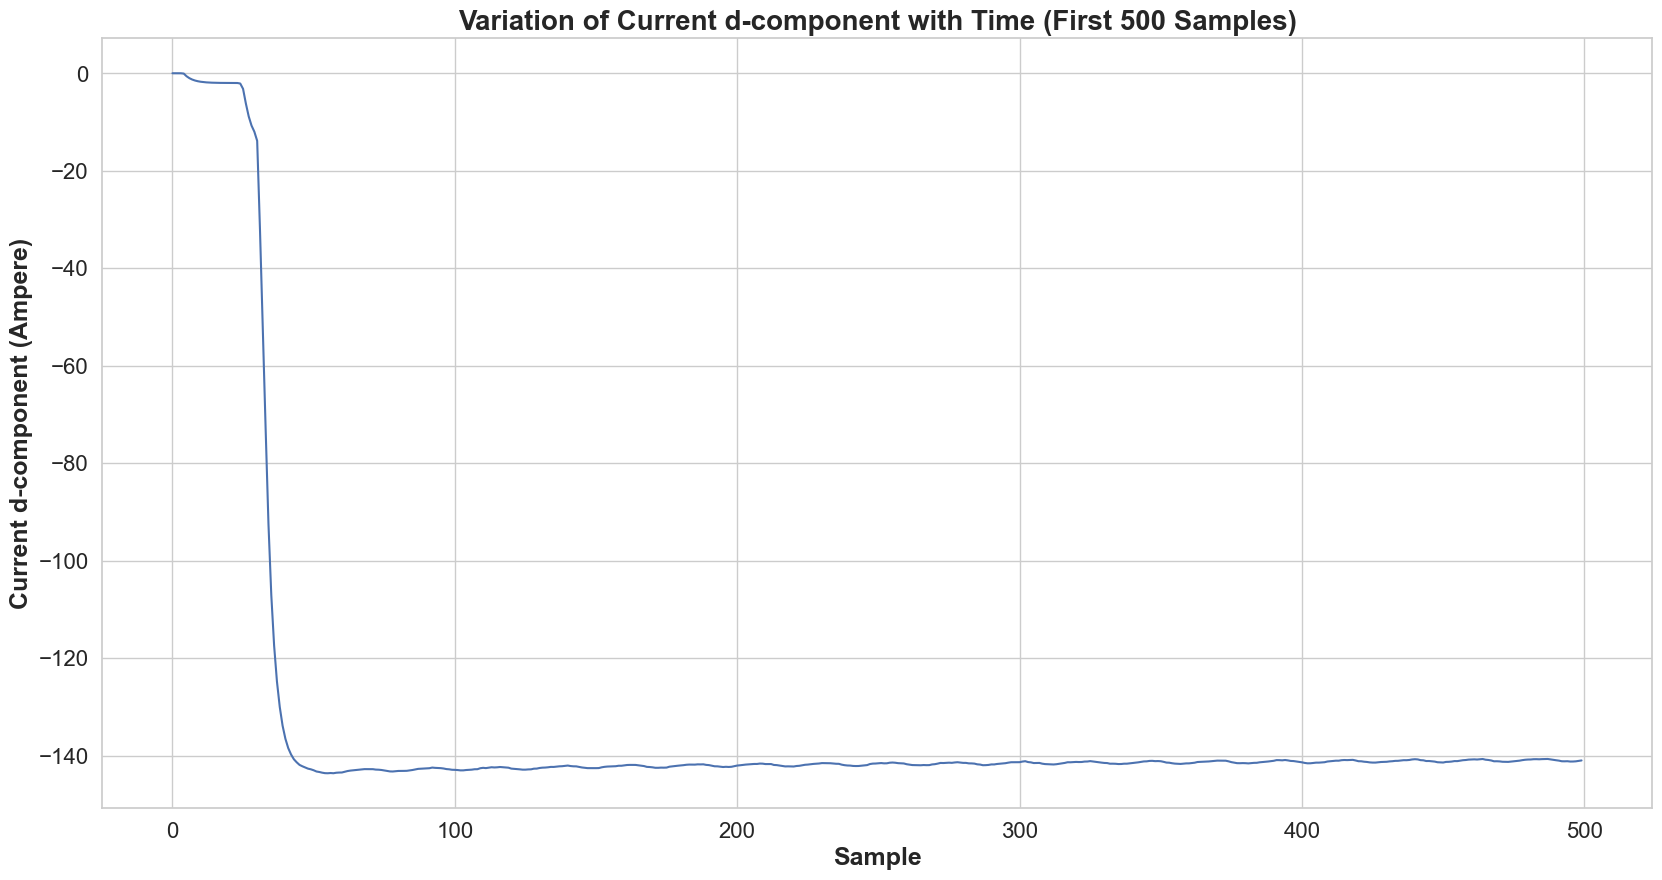

In [51]:
plt.figure(figsize = (20,10))
plt.plot(df['i_d'][:500])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Current d-component (Ampere)', fontsize = 18, weight = 'bold')
plt.title('Variation of Current d-component with Time (First 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

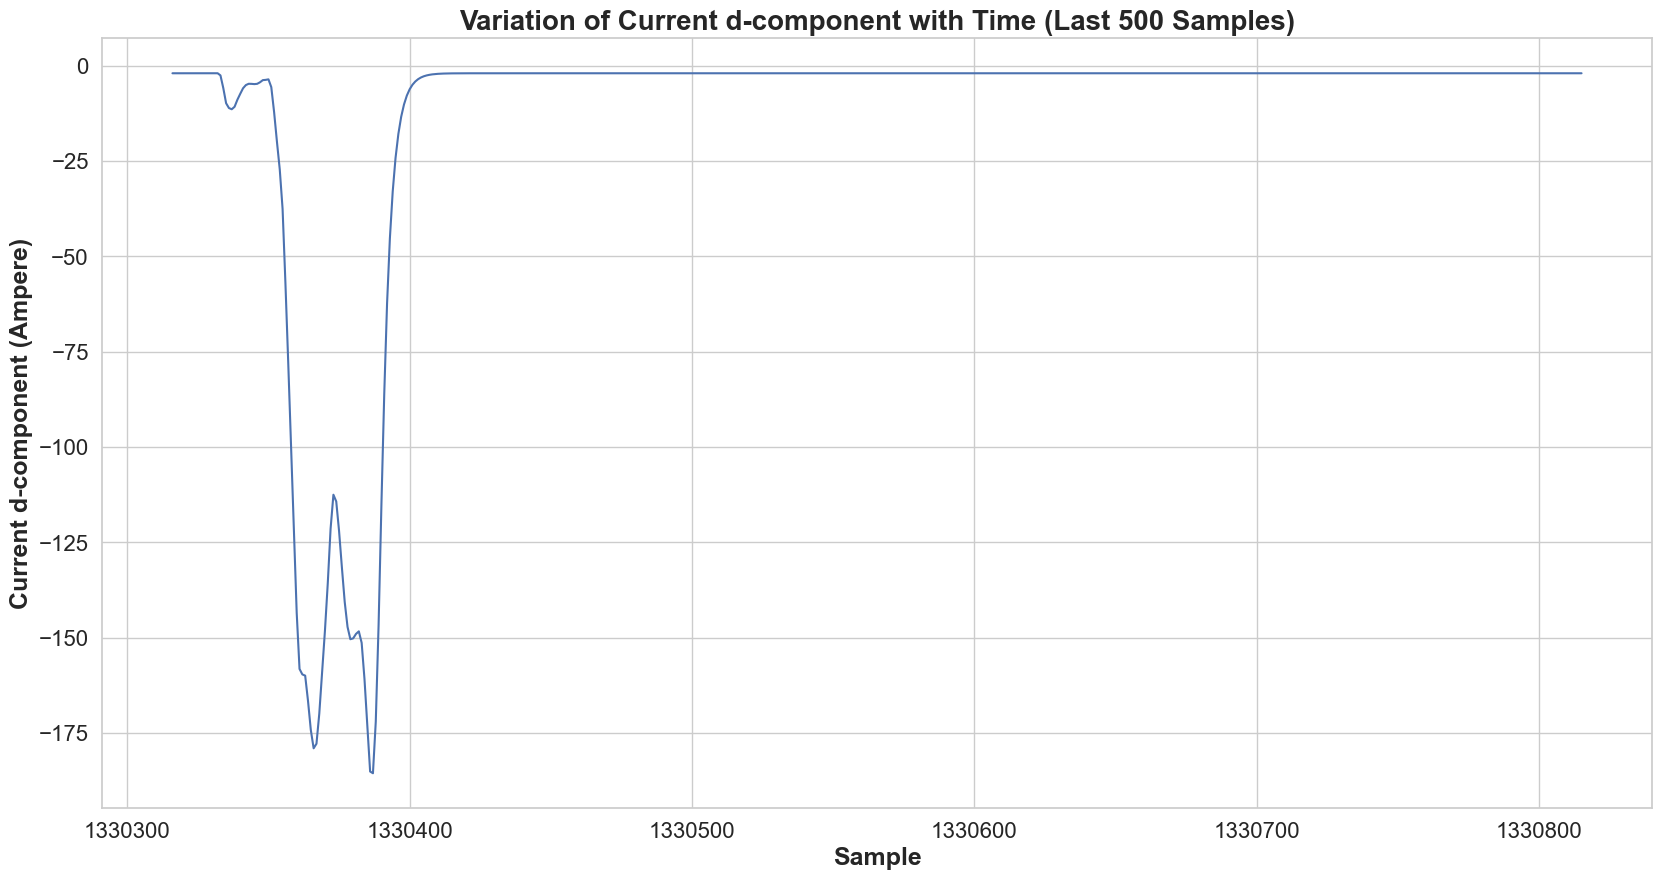

In [52]:
plt.figure(figsize = (20,10))
plt.plot(df['i_d'][-500:])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Current d-component (Ampere)', fontsize = 18, weight = 'bold')
plt.title('Variation of Current d-component with Time (Last 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

## Motor Temperature

In [53]:
df['pm'].describe()

count   1330816.000000
mean         58.506776
std          19.001498
min          20.856956
25%          43.151582
50%          60.266287
75%          72.008371
max         113.606628
Name: pm, dtype: float64

In [54]:
print('Kurtosis =',round(df['pm'].kurt(),6)) # type: ignore

Kurtosis = -0.745654


The data for the motor temperature attribute is **leptokurtic** (kurtosis < 3) <br> in nature - **short tails** and **few outliers**

In [55]:
print('Skewness =',round(df['pm'].skew(),6)) # type: ignore

Skewness = 0.038312


The data for the motor temperature attribute is **right skewed** (skewness > 0)

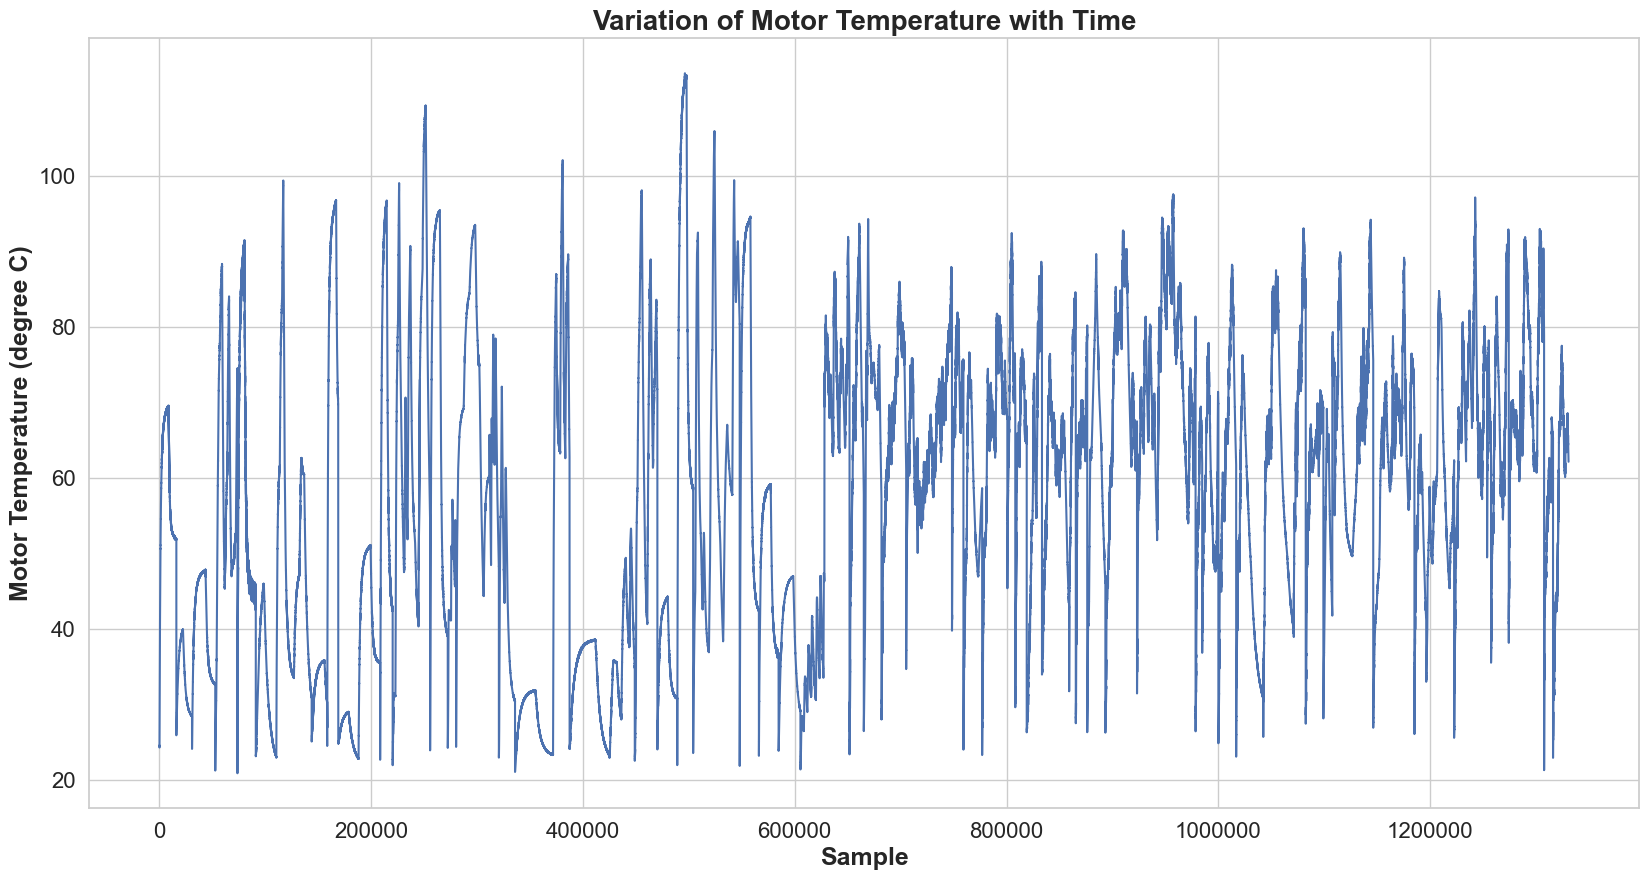

In [56]:
plt.figure(figsize = (20,10))
plt.plot(df['pm'])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Motor Temperature (degree C)', fontsize = 18, weight = 'bold')
plt.title('Variation of Motor Temperature with Time', fontsize = 20, fontweight = 'bold')
plt.show()

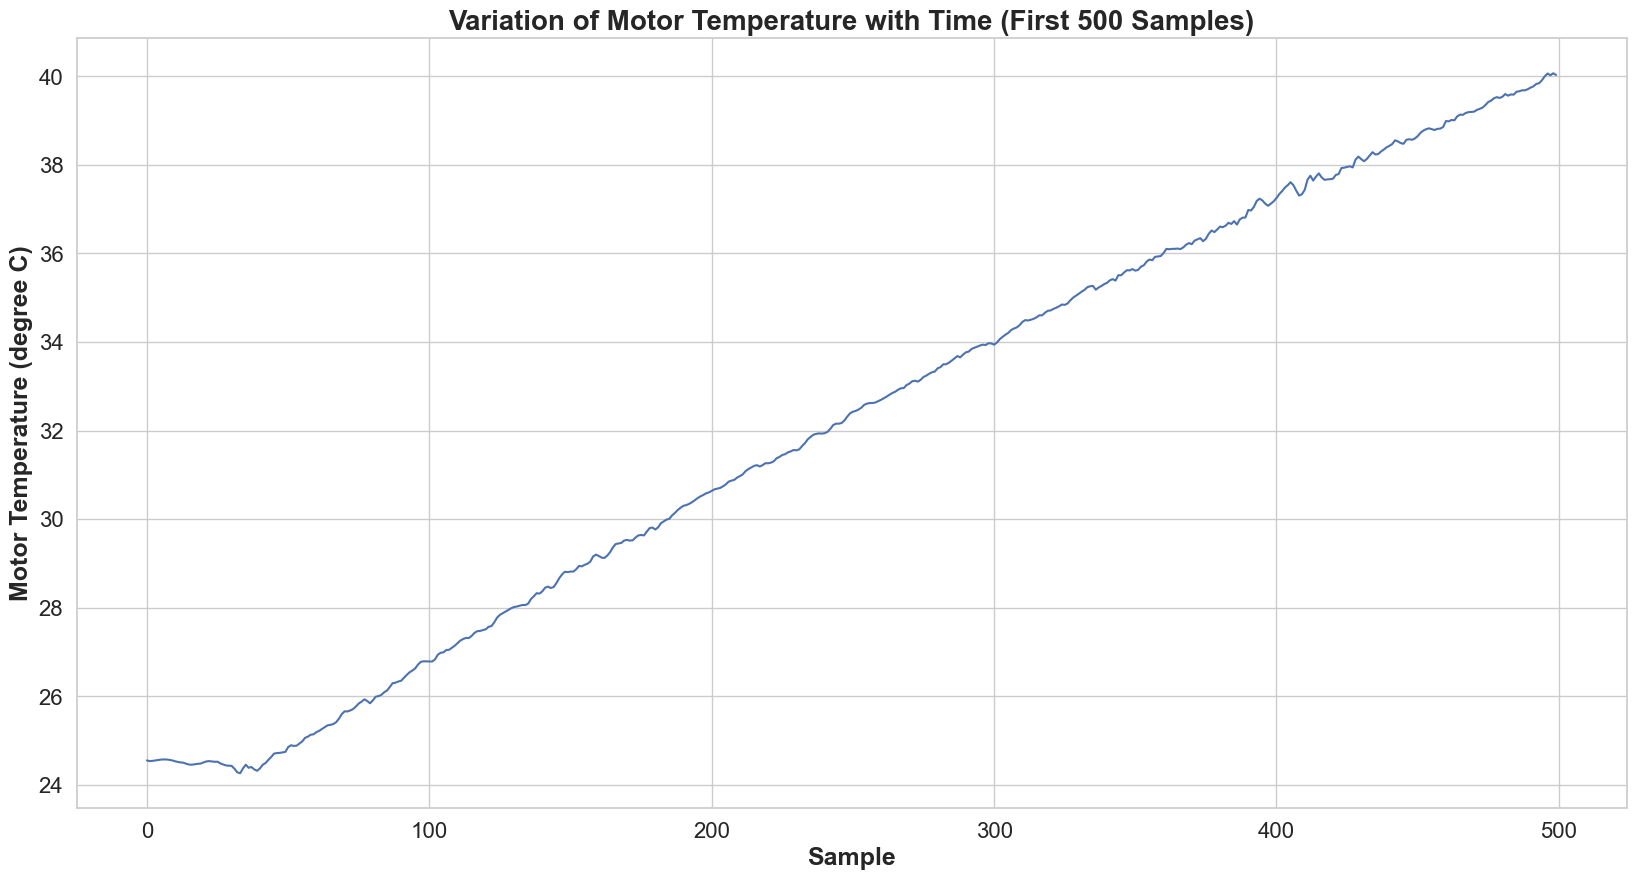

In [57]:
plt.figure(figsize = (20,10))
plt.plot(df['pm'][:500])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Motor Temperature (degree C)', fontsize = 18, weight = 'bold')
plt.title('Variation of Motor Temperature with Time (First 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

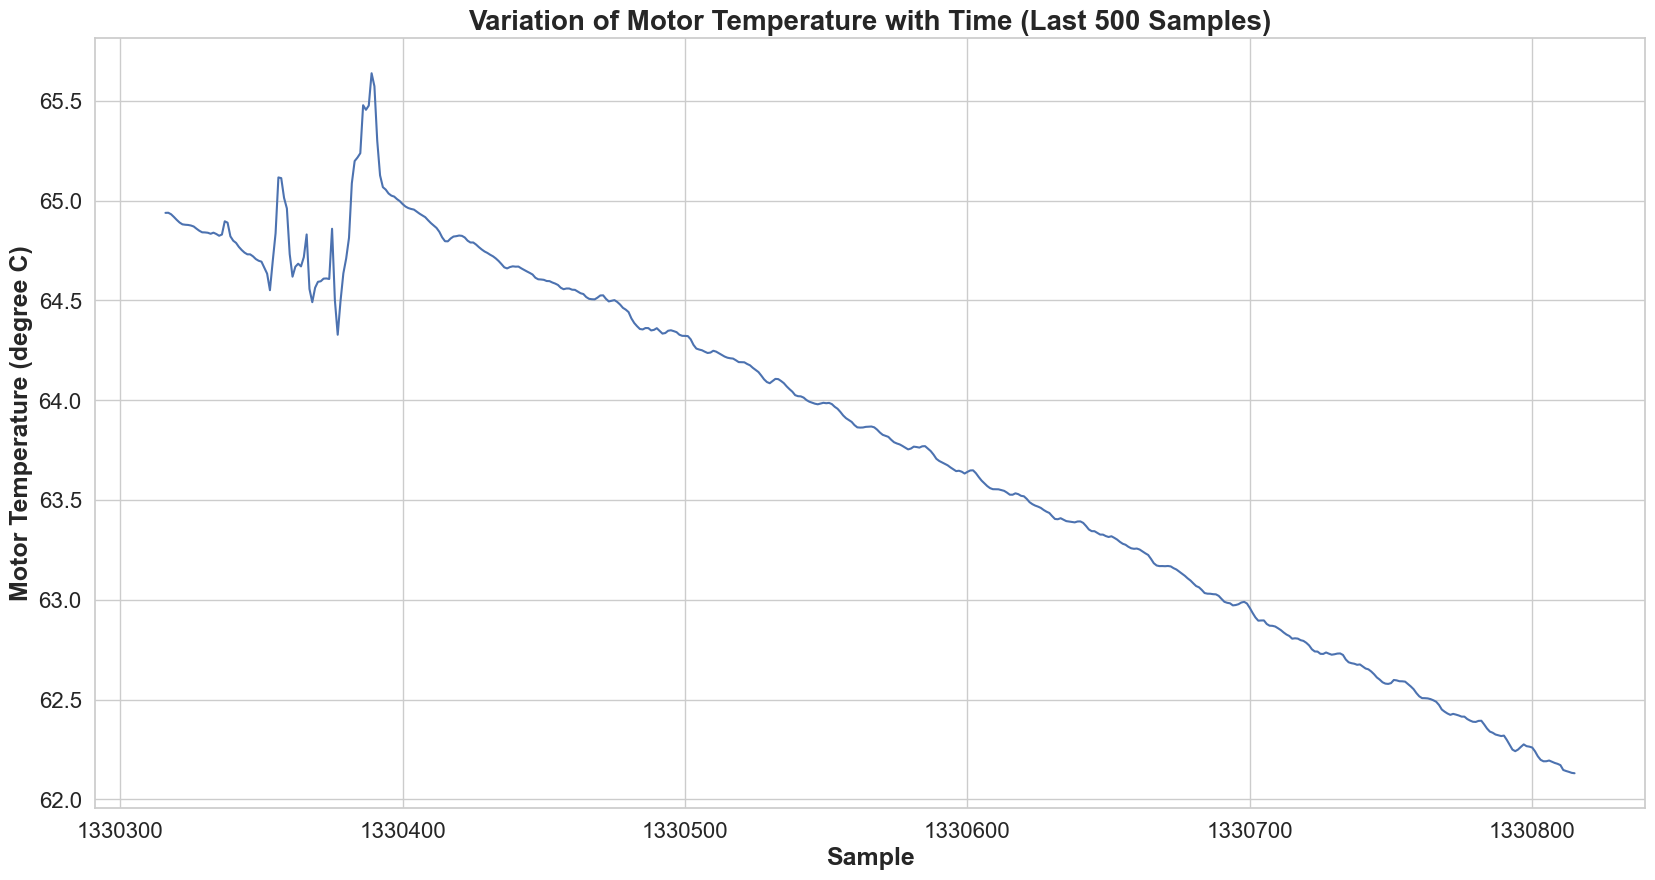

In [58]:
plt.figure(figsize = (20,10))
plt.plot(df['pm'][-500:])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Motor Temperature (degree C)', fontsize = 18, weight = 'bold')
plt.title('Variation of Motor Temperature with Time (Last 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

## Ambient Temperature

In [59]:
df['ambient'].describe()

count   1330816.000000
mean         24.565256
std           1.929522
min           8.783478
25%          23.184804
50%          24.797327
75%          26.217019
max          30.714205
Name: ambient, dtype: float64

In [60]:
print('Kurtosis =',round(df['ambient'].kurt(),6)) # type: ignore

Kurtosis = -0.137001


The data for the ambient temperature attribute is **leptokurtic** (kurtosis < 3) <br> in nature - **short tails** and **few outliers**

In [61]:
print('Skewness =',round(df['ambient'].skew(),6)) # type: ignore

Skewness = -0.349066


The data for the ambient temperature attribute is **left skewed** (skewness < 0)

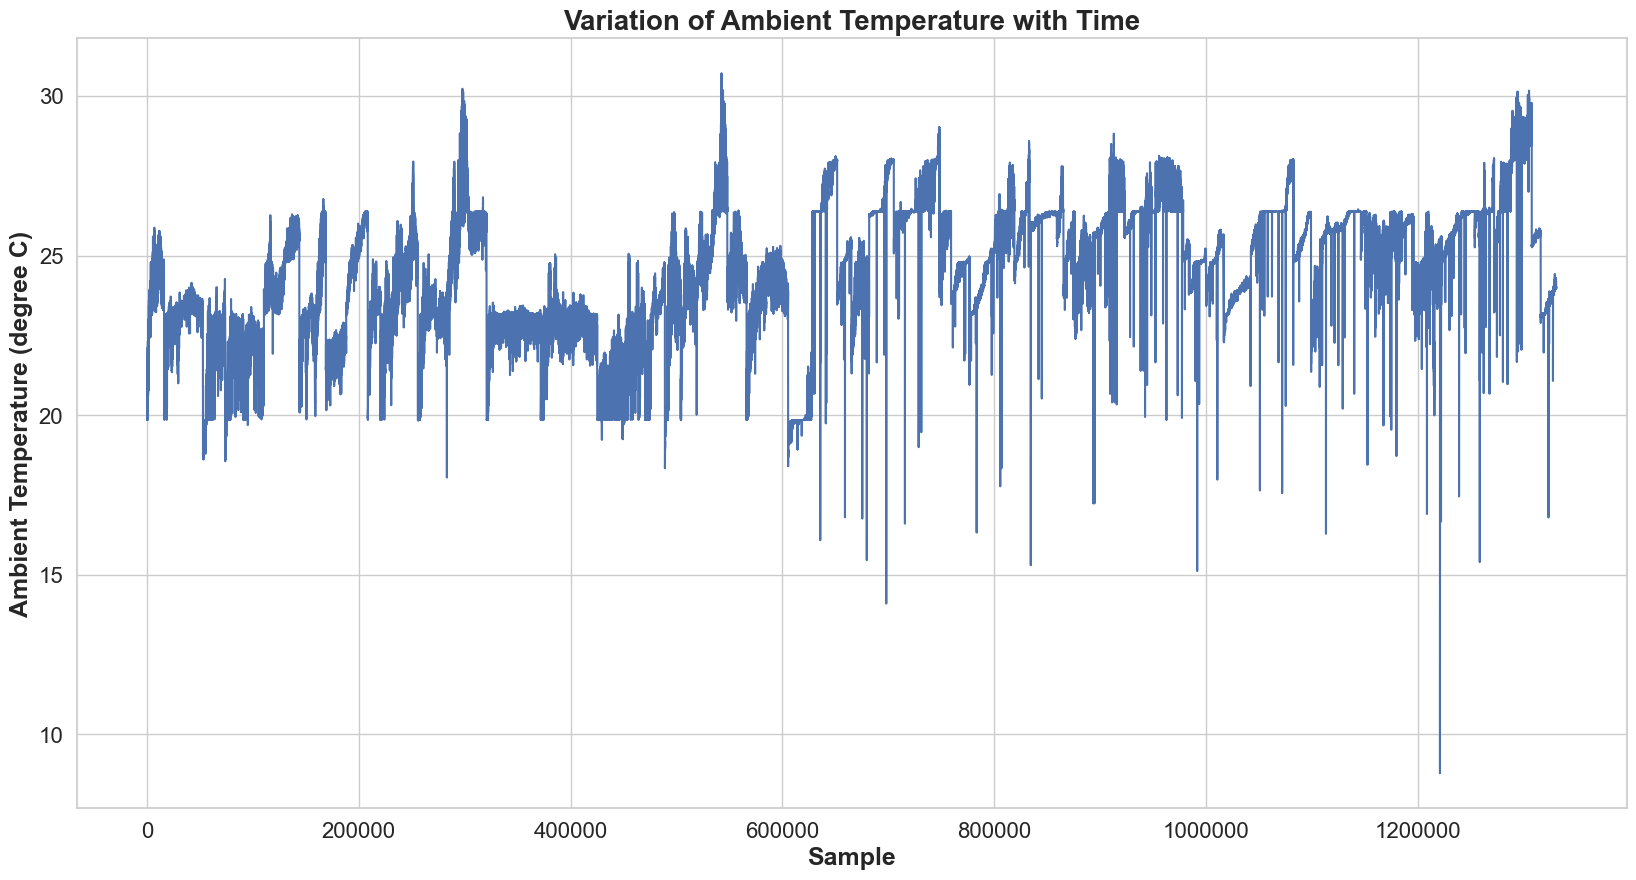

In [62]:
plt.figure(figsize = (20,10))
plt.plot(df['ambient'])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Ambient Temperature (degree C)', fontsize = 18, weight = 'bold')
plt.title('Variation of Ambient Temperature with Time', fontsize = 20, fontweight = 'bold')
plt.show()

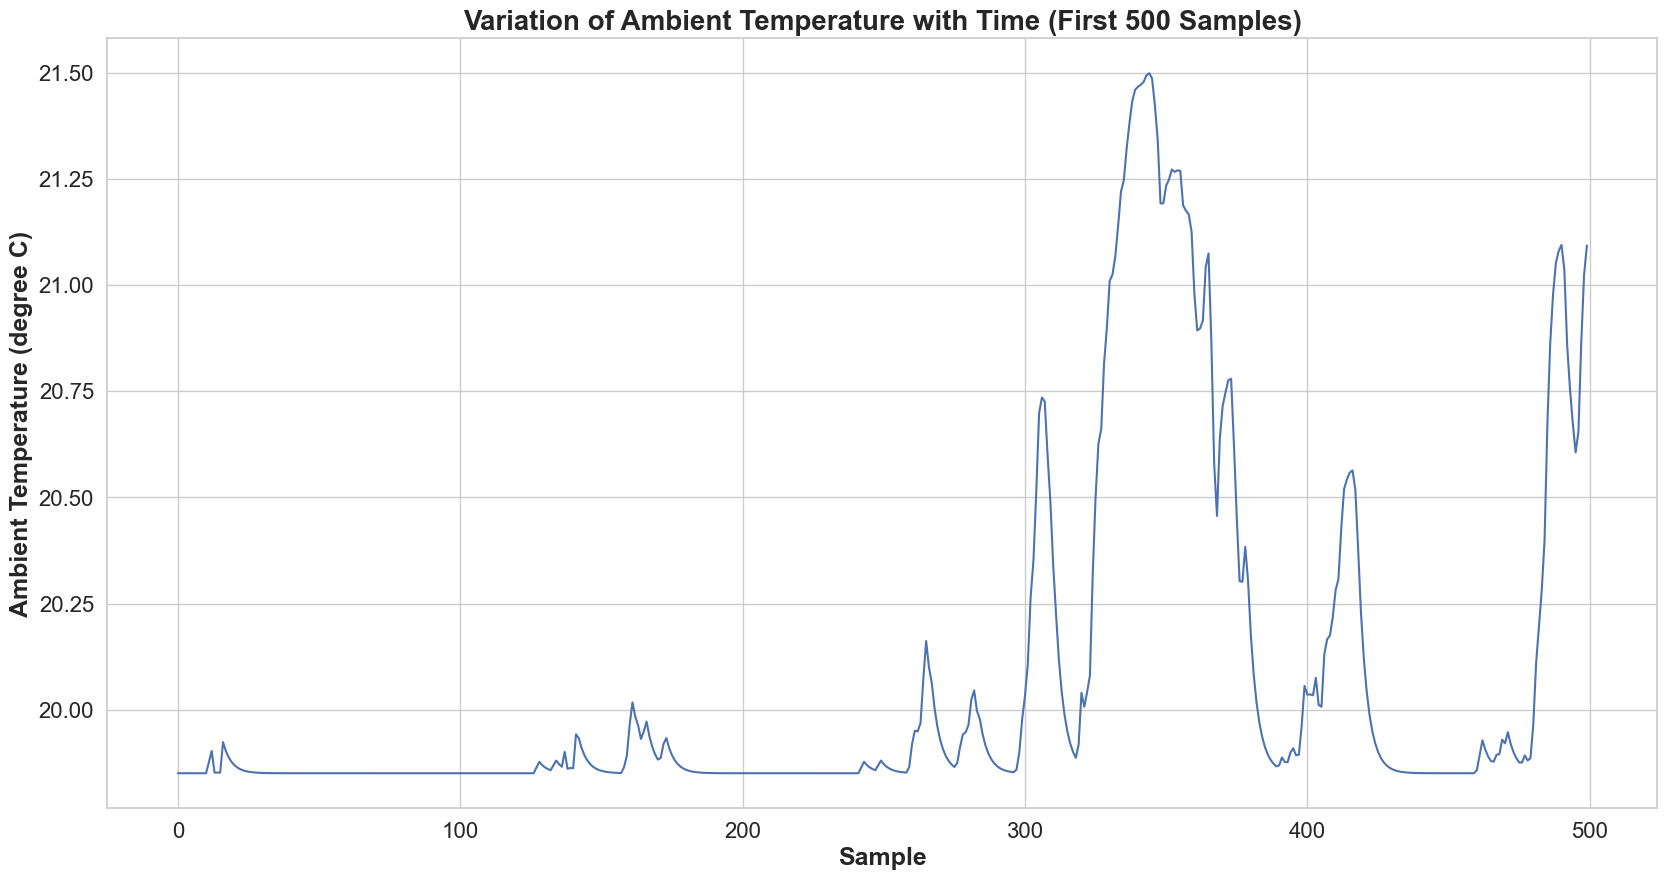

In [63]:
plt.figure(figsize = (20,10))
plt.plot(df['ambient'][:500])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Ambient Temperature (degree C)', fontsize = 18, weight = 'bold')
plt.title('Variation of Ambient Temperature with Time (First 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

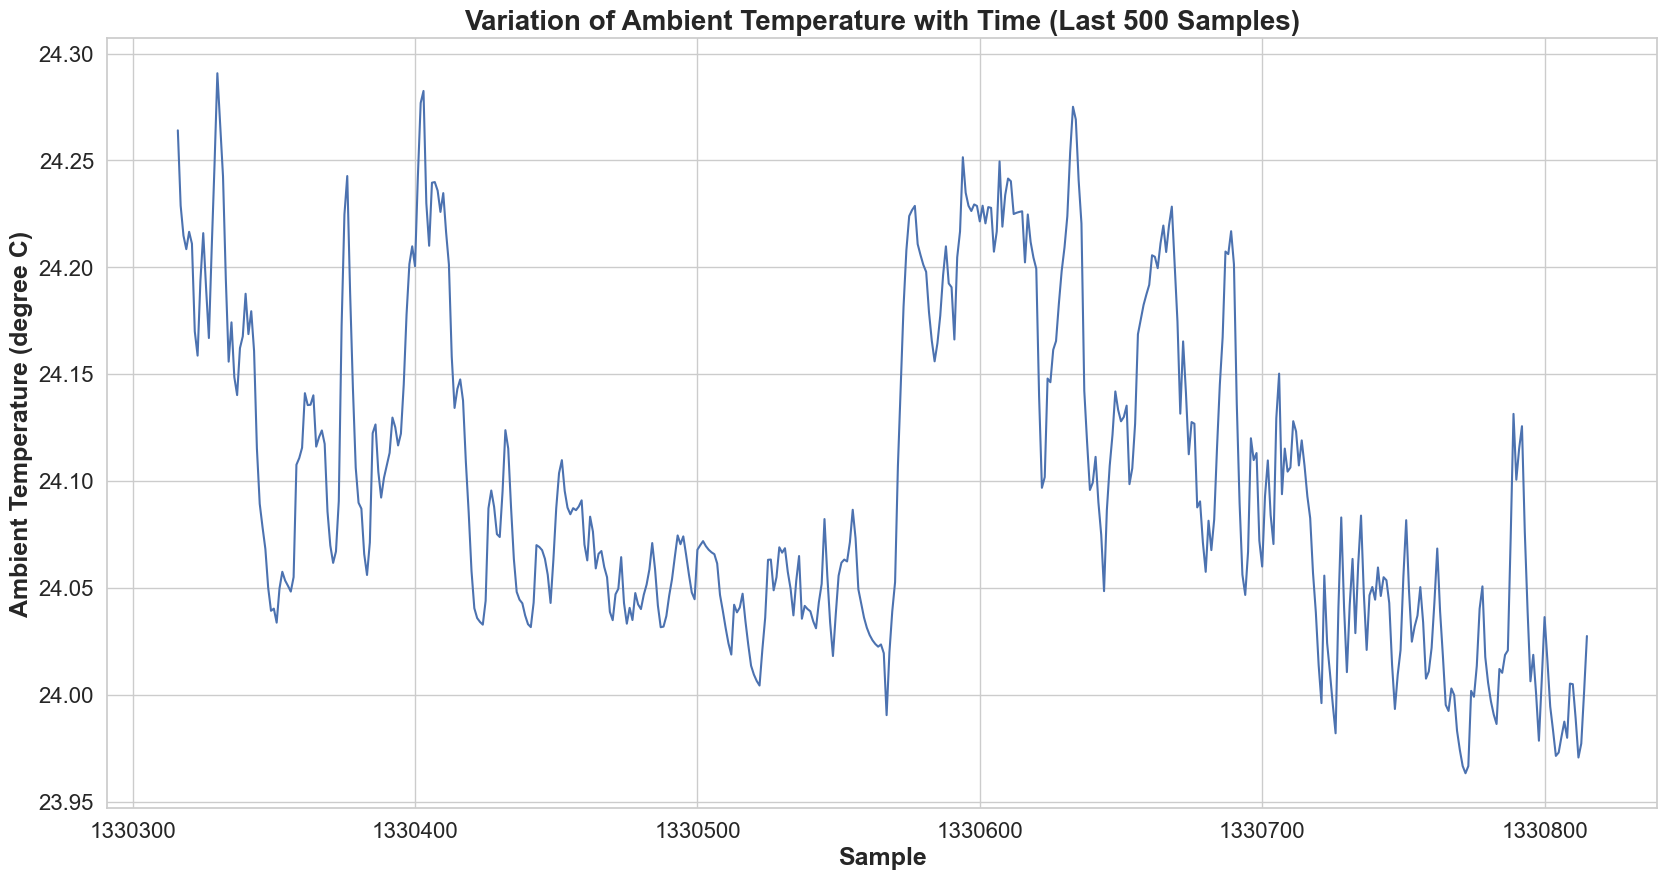

In [64]:
plt.figure(figsize = (20,10))
plt.plot(df['ambient'][-500:])
plt.ticklabel_format(style='plain', axis='x', useOffset=False, useLocale=None)
plt.ticklabel_format(style='plain', axis='y', useOffset=False, useLocale=None)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Sample', fontsize = 18, weight = 'bold')
plt.ylabel('Ambient Temperature (degree C)', fontsize = 18, weight = 'bold')
plt.title('Variation of Ambient Temperature with Time (Last 500 Samples)', fontsize = 20, fontweight = 'bold')
plt.show()

In [65]:
print('Correlation of some of the features with motor speed')
print('Voltage q-component and motor speed:',round(df['u_q'].corr(df['motor_speed']),6))
print('Voltage d-component and motor speed:',round(df['u_d'].corr(df['motor_speed']),6))
print('Current q-component and motor speed:',round(df['i_q'].corr(df['motor_speed']),6))
print('Current d-component and motor speed:',round(df['i_d'].corr(df['motor_speed']),6))
print('Motor temperature and motor speed:',round(df['pm'].corr(df['motor_speed']),6))
print('Stator winding temperature and motor speed:',round(df['stator_winding'].corr(df['motor_speed']),6))
print('Torque and motor speed:',round(df['torque'].corr(df['motor_speed']),6))

Correlation of some of the features with motor speed
Voltage q-component and motor speed: 0.683556
Voltage d-component and motor speed: -0.288472
Current q-component and motor speed: -0.068881
Current d-component and motor speed: -0.700609
Motor temperature and motor speed: 0.458947
Stator winding temperature and motor speed: 0.432034
Torque and motor speed: -0.043903


In [66]:
print('Correlation of some of the features with torque')
print('Voltage q-component and torque:',round(df['u_q'].corr(df['torque']),6))
print('Voltage d-component and torque:',round(df['u_d'].corr(df['torque']),6))
print('Current q-component and torque:',round(df['i_q'].corr(df['torque']),6))
print('Current d-component and torque:',round(df['i_d'].corr(df['torque']),6))
print('Motor temperature and torque:',round(df['pm'].corr(df['torque']),6))
print('Stator winding temperature and torque:',round(df['stator_winding'].corr(df['torque']),6))
print('Speed and torque:',round(df['motor_speed'].corr(df['torque']),6))

Correlation of some of the features with torque
Voltage q-component and torque: -0.136215
Voltage d-component and torque: -0.753779
Current q-component and torque: 0.996457
Current d-component and torque: -0.274097
Motor temperature and torque: -0.117138
Stator winding temperature and torque: 0.09551
Speed and torque: -0.043903


Text(0.5, 1.0, 'Correlation Matrix for the Dataset')

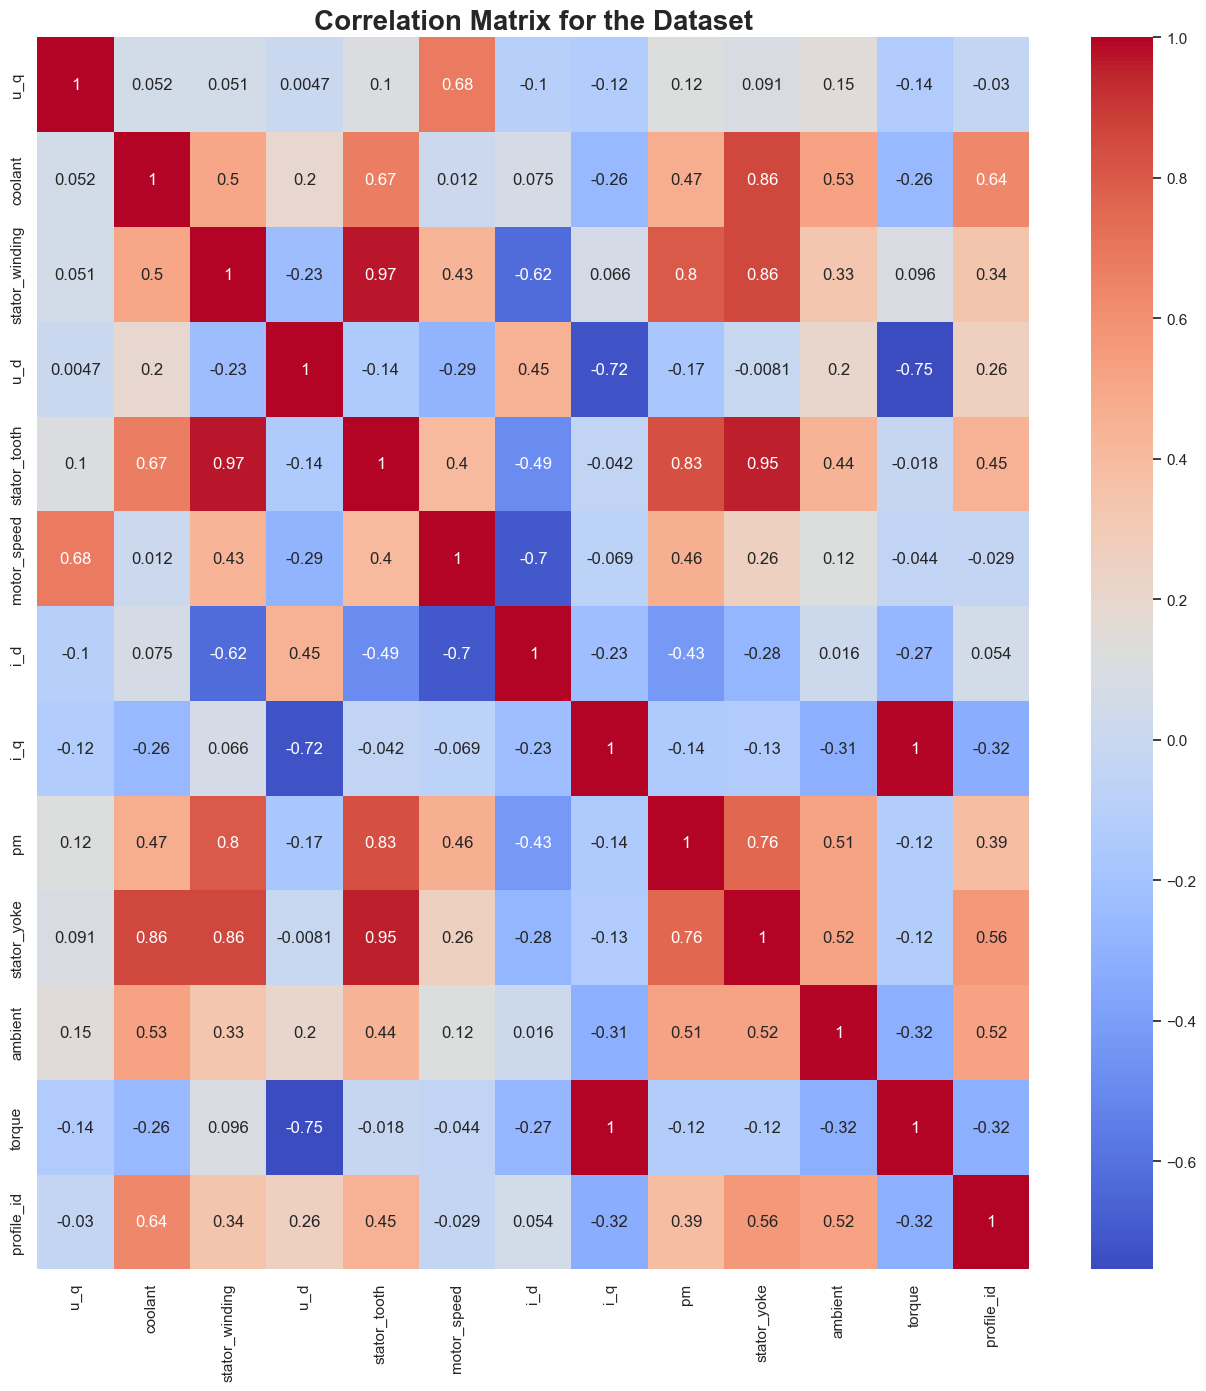

In [67]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='coolwarm')
ax.set_title('Correlation Matrix for the Dataset', fontdict={'fontsize': 20, 'fontweight': 'bold'})

***